# **Análisis Exploratorio de Datos**
Después de una exhaustiva revisión de los conjuntos de datos disponibles en https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/, se ha decidido seleccionar los siguientes conjuntos que mejor se alinean con nuestro enfoque analítico. A continuación, se llevará a cabo un Análisis Exploratorio de Datos (EDA) para profundizar en la comprensión de los datos y alcanzar nuestros objetivos analíticos.

## **Selección de Datasets**
En algunos casos, hemos utilizado la API con el filtro 'category_name= "Acceso a internet" para nuestra descarga principal. Sin embargo, al analizar los datos, identificamos algunas inconsistencias. Descargamos la misma información directamente desde la página web y, basándonos en la coherencia y calidad de los datos, decidimos retener uno u otro conjunto, como se detalla en el proceso ETL (Extract, Transform, Load).

## **Exclusión de Dataset**

Hemos decidido excluir el conjunto de datos "Indicadores macroeconómicos", que incluye índices como el índice de precios al consumidor (IPC), la tasa de cambio peso-dólar y el producto bruto interno (PBI), ya que no son necesarios para nuestro análisis en este momento. Además, el conjunto de datos "Penetración nacional del Internet fijo" también se ha excluido, ya que podemos obtener información equivalente de otros conjuntos de datos específicos, mejorando así la precisión durante el proceso ETL.

Cabe mencionar que los datasets que estaremos utilizando provienen de la carpeta de **datasets_cleaned**.

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Inicialización

Importamos las librerías que nos servirán para poder procesar, visualizar y explorar nuestros datos de manera efectiva, la librería `pandas`, `seaborn`, `matplotlib`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

## Dataset 1:
## Penetración del Internet fijo por provincia (accesos por cada 100 habitantes)

In [5]:
# carga del archivo:
accesos_por_cada_100_habitantes = pd.read_csv('./datasets_cleaned/accesos_por_cada_100_habitantes.csv')

In [7]:
accesos_por_cada_100_habitantes.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73


In [8]:
accesos_por_cada_100_habitantes.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,14.804954
std,2.583484,1.118682,9.021731
min,2014.000000,1.000000,2.680000
25%,2016.000000,1.750000,8.390000
50%,2018.000000,2.500000,12.870000
75%,2020.000000,3.250000,19.082500
max,2022.000000,4.000000,52.240000


En este análisis estadístico descriptivo, los datos abarcan un periodo desde 2014 hasta 2022, totalizando 864 registros. A lo largo de este lapso, el promedio de accesos a internet por cada 100 habitantes se mantiene alrededor de 14.80, indicando una presencia moderada de conectividad a nivel nacional. No obstante, la desviación estándar de 9.02 revela una variabilidad significativa entre provincias o regiones, señalando disparidades en los niveles de acceso.

Los valores mínimo y máximo, 2.68 y 52.24 respectivamente, resaltan la marcada brecha en el acceso a internet entre diferentes áreas geográficas. Esta disparidad podría indicar desafíos en la infraestructura de telecomunicaciones o reflejar diferencias socioeconómicas notables. La distribución trimestral se mantiene relativamente equitativa, con un promedio constante alrededor de 2.5, indicando consistencia a lo largo del tiempo.

En resumen, estos datos subrayan la diversidad en el acceso a internet en Argentina. Mientras algunas áreas disfrutan de un acceso robusto, otras enfrentan desafíos notables. Este análisis proporciona una base para explorar las disparidades y abordar áreas que puedan requerir mejoras en la infraestructura de telecomunicaciones o iniciativas para reducir la brecha digital.

## Explorando la Distribución de Datos

A través del `diagrama de caja` o `Boxplot`, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

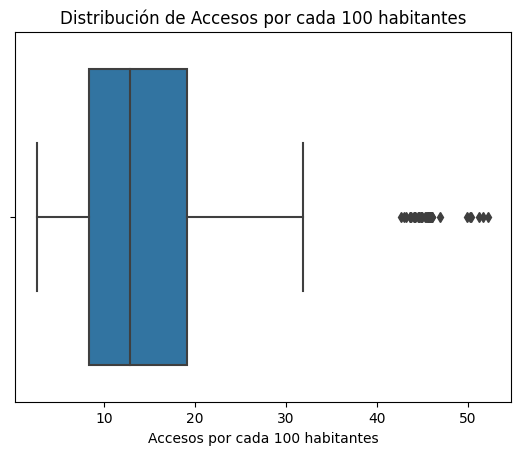

In [38]:
# Crear el boxplot con Seaborn
sns.boxplot(x=accesos_por_cada_100_habitantes['Accesos por cada 100 hab'])

# Añadir etiquetas
plt.xlabel('Accesos por cada 100 habitantes')
plt.title('Distribución de Accesos por cada 100 habitantes')

# Mostrar el gráfico
plt.show()

Podemos observar una representación visual de la distribución y la presencia de outliers en los datos. En este caso, se observa que la mediana se sitúa alrededor de 13 personas de cada 100 tienen acceso a internet, lo que indica que la mitad de las provincias tienen un acceso por cada 100 habitantes por encima de este valor.

La caja abarca desde el primer cuartil (Q1) al tercer cuartil (Q3), lo que refleja la dispersión intercuartilica (IQR). La mayor concentración de datos se encuentra dentro de esta caja, señalando que la mayoría de las provincias mantienen niveles moderados de acceso a internet.

Sin embargo, el gráfico de cajas también revela la presencia de outliers, indicados por puntos fuera de los "bigotes" del gráfico. Estos valores atípicos, subrayan la existencia de disparidades significativas en el acceso a internet en algunas regiones. 

## Análisis Temporal de Accesos a Internet en Argentina

En este análisis, exploraremos la evolución del acceso a internet en Argentina a lo largo del tiempo, centrándonos en la variación trimestral. Al agrupar los datos por año y trimestre, examinaremos las tendencias y comportamientos que han definido el panorama de la conectividad en el país. Este enfoque nos permitirá no solo identificar patrones estacionales, sino también comprender cómo las medias de acceso han evolucionado a lo largo de los años, proporcionando una visión más completa de la dinámica de la conectividad a nivel nacional.

In [39]:
# Agrupar por 'Año' y 'Trimestre' y calcular la media
accesos_agrupados = accesos_por_cada_100_habitantes.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hab'].mean().reset_index()

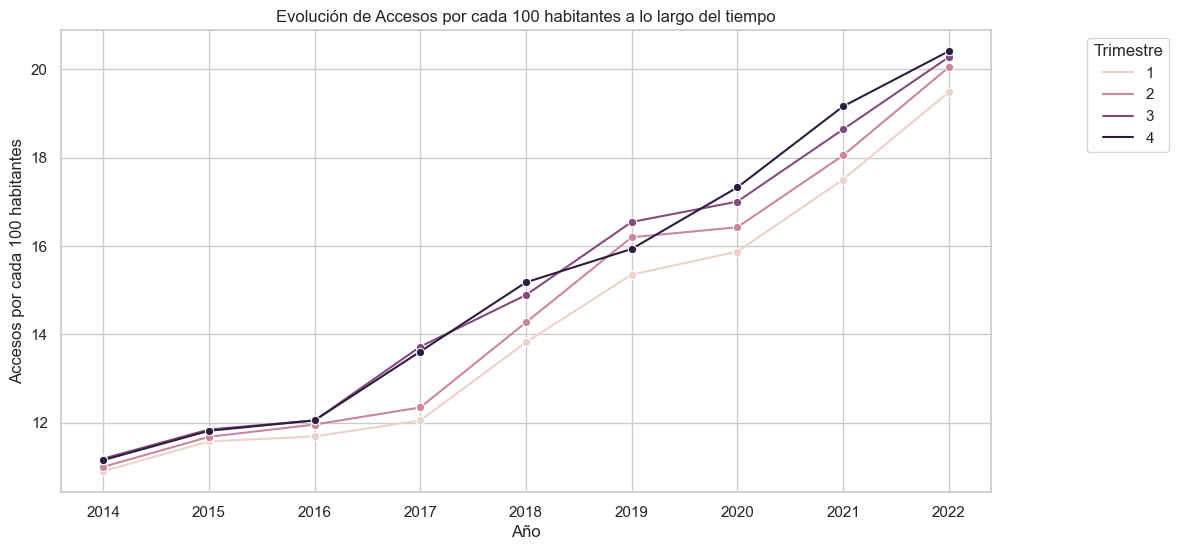

In [40]:
# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de líneas con dispersión
plt.figure(figsize=(12, 6))
sns.lineplot(data=accesos_agrupados, x='Año', y='Accesos por cada 100 hab', hue='Trimestre', marker='o', ci=None)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Evolución de Accesos por cada 100 habitantes a lo largo del tiempo')

# Mostrar la leyenda
plt.legend(title='Trimestre', loc='upper right', bbox_to_anchor=(1.2, 1))

# Mostrar el gráfico
plt.show()

Hemos adoptado un enfoque estratégico al analizar la conectividad a internet en Argentina, centrándonos en las variaciones trimestrales y anuales para comprender mejor su evolución a lo largo del tiempo. Al agrupar los datos por año y trimestre y calcular las medias respectivas, hemos logrado destacar patrones significativos que revelan una tendencia constante de crecimiento.

In [44]:
accesos_por_cada_100_habitantes.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26.72
1,2022,4,Capital Federal,50.35
2,2022,4,Catamarca,16.73
3,2022,4,Chaco,11.66
4,2022,4,Chubut,26.23


## Distribución de Accesos a Internet por Provincia

 Este gráfico destaca la variabilidad en la cantidad de accesos a Internet por cada 100 habitantes en distintas provincias argentinas.

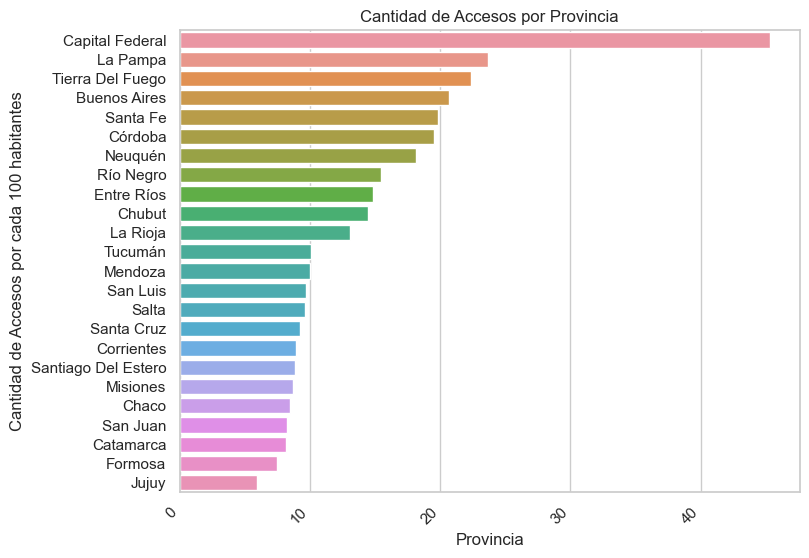

In [58]:
# Hacemos una query para ver ordenado por provincia los accesos utilizando la mediana
grafico = accesos_por_cada_100_habitantes[["Provincia", "Accesos por cada 100 hab"]].groupby("Provincia").median().reset_index().sort_values(by="Accesos por cada 100 hab", ascending=False)

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(y='Provincia', x='Accesos por cada 100 hab', data=grafico)

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Accesos por cada 100 habitantes')
plt.title('Cantidad de Accesos por Provincia')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


El análisis detallado de la conectividad a Internet por provincia revela notables disparidades en Argentina. Capital Federal destaca como líder muy por encima del resto, seguido por La Pampa y Tierra del Fuego, reflejando una mayor presencia de accesos a Internet por cada 100 habitantes. En contraste, Catamarca, Formosa y Jujuy muestran una conectividad más limitada.

# **Dataset 3:**  
# **Penetración del Internet fijo por provincia (accesos por cada 100 hogares)**

In [48]:
# carga del archivo:
accesos_por_cada_100_hogares = pd.read_csv('./datasets_cleaned/accesos_por_cada_100_hogares.csv')

In [49]:
accesos_por_cada_100_hogares.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77


In [54]:
accesos_por_cada_100_hogares.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,864.00,864.00,864.00
mean,2018.00,2.50,49.62
std,2.58,1.12,23.32
min,2014.00,1.00,9.35
25%,2016.00,1.75,32.22
50%,2018.00,2.50,46.39
75%,2020.00,3.25,62.44
max,2022.00,4.00,124.06


Este conjunto de datos revela un panorama interesante sobre la conectividad en Argentina. Con un período de estudio desde 2014 hasta 2022 y 864 registros, podemos observar que el acceso a Internet varía significativamente entre provincias y a lo largo del tiempo.

La media de accesos por cada 100 hogares se sitúa en 49.62, mostrando una presencia considerable de conectividad a nivel nacional. No obstante, la desviación estándar de 23.32 indica una variabilidad significativa, lo que sugiere disparidades notables entre regiones.

Al observar los cuartiles, podemos identificar que el 25% de las observaciones tienen un acceso inferior a 32.22, mientras que el 75% supera los 62.44. Esto evidencia una marcada dispersión en los niveles de conectividad. Además, el hecho de que el 50% de los datos se concentre entre 32.22 y 62.44 sugiere una distribución sesgada hacia valores más altos.

En resumen, estos datos subrayan la importancia de abordar las disparidades en el acceso a Internet en Argentina. La presencia de valores extremadamente altos y bajos destaca la necesidad de políticas y estrategias que promuevan una conectividad equitativa en todas las regiones del país. Este análisis proporciona una base valiosa para la toma de decisiones informadas en el ámbito de las telecomunicaciones y la reducción de la brecha digital.

## Explorando la Distribución de Datos

`diagrama de caja` o `Boxplot`

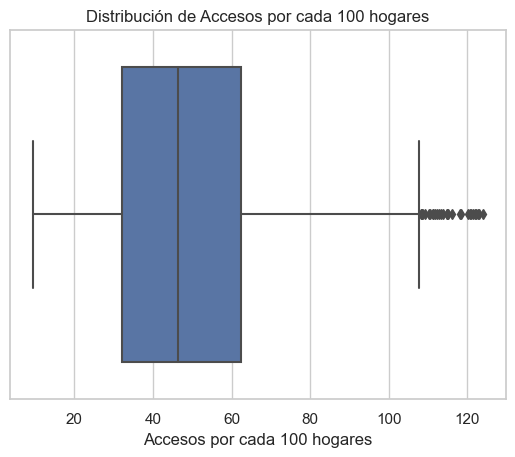

In [51]:
# Crear el boxplot con Seaborn
sns.boxplot(x=accesos_por_cada_100_hogares['Accesos por cada 100 hogares'])

# Añadir etiquetas
plt.xlabel('Accesos por cada 100 hogares')
plt.title('Distribución de Accesos por cada 100 hogares')

# Mostrar el gráfico
plt.show()

Al explorar visualmente la distribución de los accesos a Internet por cada 100 hogares en Argentina podemos ver que los datos presentan una mediana de 46 aproximadamente, indicando que el 50% de las provincias tienen una cantidad de accesos por debajo de este valor. El tercer cuartil, situado en 63 aproximadamente, destaca las disparidades en la conectividad, evidenciando que algunas provincias presentan números significativamente más altos.

La presencia de valores atípicos, sugiere una brecha notoria entre las regiones del país. Esta representación gráfica ofrece una perspectiva clara sobre la variabilidad de los accesos a Internet en Argentina.

## Análisis Temporal de Accesos a Internet en Argentina

En este análisis, exploraremos la evolución del acceso a internet en Argentina a lo largo del tiempo en los hogares, centrándonos en la variación trimestral. Al agrupar los datos por año y trimestre, examinaremos las tendencias y comportamientos que han definido el panorama de la conectividad de los hogares en el país. Este enfoque nos permitirá no solo identificar patrones estacionales, sino también comprender cómo las medias de acceso han evolucionado a lo largo de los años, proporcionando una visión más completa de la dinámica de la conectividad a nivel nacional.

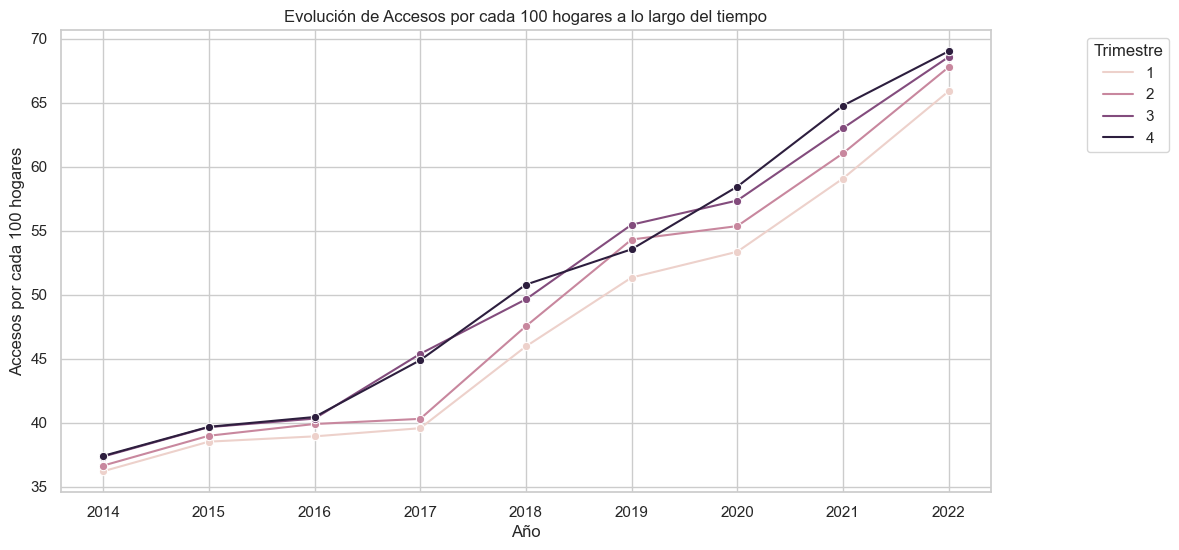

In [55]:
# Agrupar por 'Año' y 'Trimestre' y calcular la media
accesos_agrupados = accesos_por_cada_100_hogares.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de líneas con dispersión
plt.figure(figsize=(12, 6))
sns.lineplot(data=accesos_agrupados, x='Año', y='Accesos por cada 100 hogares', hue='Trimestre', marker='o', ci=None)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de Accesos por cada 100 hogares a lo largo del tiempo')

# Mostrar la leyenda
plt.legend(title='Trimestre', loc='upper right', bbox_to_anchor=(1.2, 1))

# Mostrar el gráfico
plt.show()


Como era de esperarse, podemos observar gran similitud entre las gráficas de acceso a internet por cada 100 habitantes y acceso por cada 100 hogares, destacando patrones significativos que revelan una tendencia constante de crecimiento. Esta consistencia en los patrones nos lleva a suponer una fuerte correlación entre ambos conjuntos de datos. 

## Distribución de Accesos a Internet en hogares por Provincia

 Este gráfico destaca la variabilidad en la cantidad de accesos a Internet por cada 100 habitantes en distintas provincias argentinas.

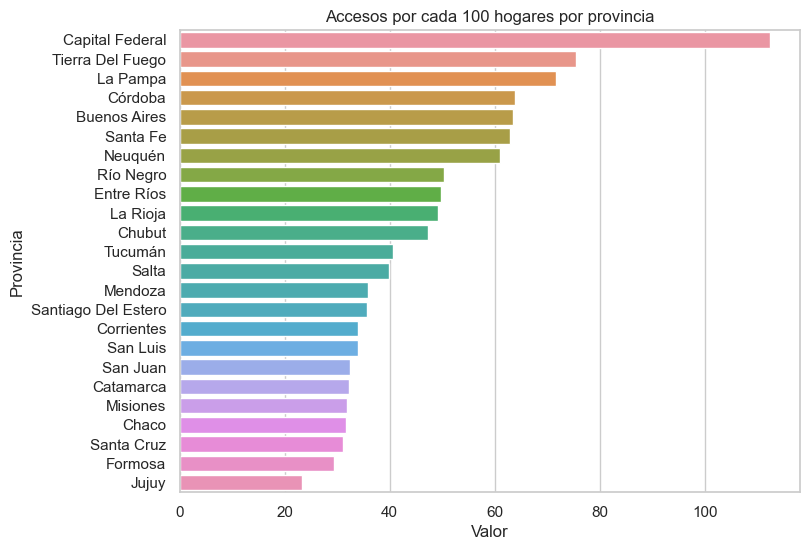

In [59]:
# Hacemos una query para ver ordenado por provincia los accesos utilizando la mediana
graf2 = accesos_por_cada_100_hogares[["Provincia","Accesos por cada 100 hogares"]].groupby("Provincia").median().reset_index().sort_values(by="Accesos por cada 100 hogares",ascending=False)

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Accesos por cada 100 hogares', y='Provincia', data=graf2)

# Añadimos las etiquetas y el título
ax.set_xlabel('Valor')
ax.set_ylabel('Provincia')
ax.set_title('Accesos por cada 100 hogares por provincia')

# Mostrar el gráfico
plt.show()

Los hallazgos reflejan similitudes notables con la distribución de accesos por cada 100 habitantes, sugiriendo una correlación robusta entre ambos conjuntos de datos.

En esta representación gráfica, se observa que, al igual que en el acceso por cada 100 habitantes, Capital Federal lidera como la provincia con la mayor cantidad de accesos, seguida de cerca por Tierra del Fuego y La Pampa. Estas provincias presentan una presencia más significativa en términos de conectividad, probablemente asociada a factores como densidad poblacional y desarrollo tecnológico.

En contraste, Santa Cruz, Formosa y Jujuy muestran una menor cantidad de accesos, revelando desafíos en la infraestructura de telecomunicaciones o posiblemente disparidades socioeconómicas en estas regiones. Estos resultados proporcionan una visión integral de la distribución de la conectividad en hogares por provincia, esencial para orientar políticas y estrategias que aborden las brechas digitales existentes.

## Explorando la Relación: Accesos a Internet en Hogares y Habitantes por Provincia en Argentina


Al observar la gran similitud entre los gráficos de accesos a Internet por cada 100 habitantes y accesos a Internet en hogares por provincia, surge la hipótesis de una correlación substancial entre estos dos conjuntos de datos. Para evaluar y visualizar esta relación, calcularemos la correlación y emplearemos un gráfico de dispersión. Estas herramientas nos permitirán explorar de manera más profunda la conexión subyacente entre los niveles de conectividad en hogares y su correlación con la accesibilidad a Internet a nivel poblacional en las diversas provincias argentinas.

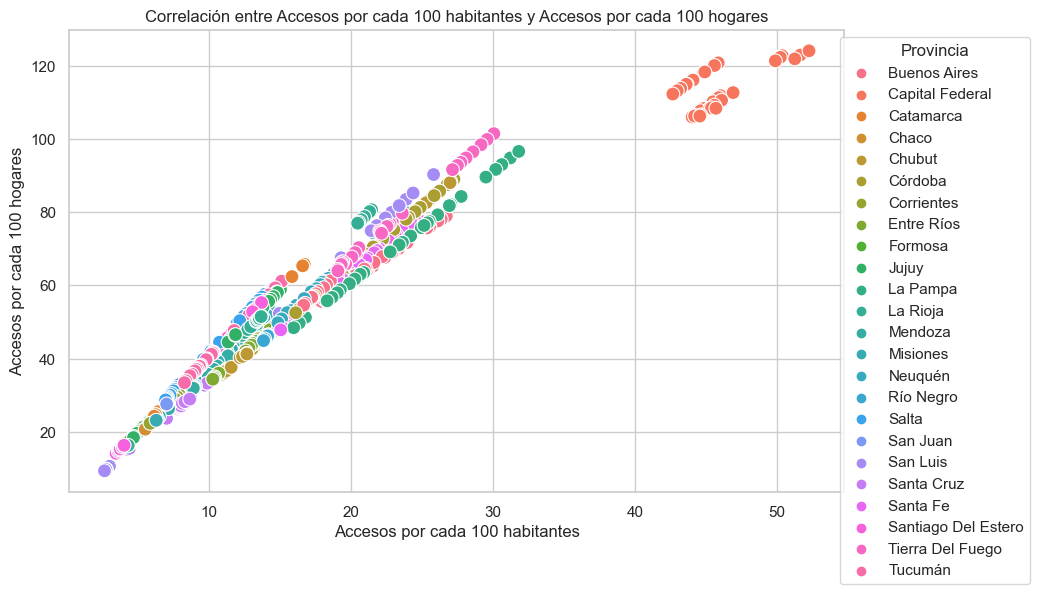

In [61]:
# Crear un DataFrame combinando ambos conjuntos de datos
df_combinado = pd.merge(accesos_por_cada_100_habitantes, accesos_por_cada_100_hogares, on=['Año', 'Trimestre', 'Provincia'])

# Estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combinado, x='Accesos por cada 100 hab', y='Accesos por cada 100 hogares', hue='Provincia', s=100)

# Añadir etiquetas y título
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Correlación entre Accesos por cada 100 habitantes y Accesos por cada 100 hogares')

# Mostrar la leyenda
plt.legend(title='Provincia', loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()


Después de observar el gráfico de dispersión, se confirma la presencia de una relación lineal apreciable entre la cantidad de accesos a Internet por cada 100 hogares y por cada 100 habitantes en las provincias argentinas. Este hallazgo sugiere que, en términos generales, a medida que aumenta la conectividad en los hogares, también tiende a aumentar el acceso a Internet por parte de los habitantes.

Para reforzar este análisis, procederemos a calcular la correlación entre estas dos variables.

In [65]:
# Calcular la correlación entre las columnas específicas
correlacion_numeric = df_combinado['Accesos por cada 100 hab'].corr(df_combinado['Accesos por cada 100 hogares'])

# Imprimir el resultado
print(f"Correlación entre Accesos por cada 100 hab y Accesos por cada 100 hogares: {correlacion_numeric}")


Correlación entre Accesos por cada 100 hab y Accesos por cada 100 hogares: 0.9717948580819806


La correlación entre "Accesos por cada 100 hab" y "Accesos por cada 100 hogares" es bastante alta, con un valor de aproximadamente 0.97. Este valor cercano a 1 sugiere una fuerte relación lineal positiva entre estas dos variables. En otras palabras, cuando el número de accesos a Internet por cada 100 habitantes aumenta, también tiende a aumentar el número de accesos por cada 100 hogares, y viceversa. Esta relación positiva indica que ambos indicadores están estrechamente relacionados.

# **Dataset 4:**  
# **Acceso a Internet Fijo por rangos de velocidad de bajada y provincia**  

In [76]:
# carga del archivo:
acceso_rangos_velocidad_de_bajada_y_provincia  = pd.read_csv('./datasets_cleaned/acceso_rangos_velocidad_de_bajada_y_provincia.csv')

In [77]:
acceso_rangos_velocidad_de_bajada_y_provincia.head(3)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.00,23347.00,259866.00,281550.00,244555.00,98670.00,3760109.00,97634.00,4794665.00
1,2022,4,Capital Federal,516.00,5096.00,31320.00,64653.00,36336.00,8116.00,1299117.00,106772.00,1551926.00
2,2022,4,Catamarca,71.00,315.00,2716.00,5028.00,4638.00,3122.00,52739.00,2280.00,70909.00


In [78]:
acceso_rangos_velocidad_de_bajada_y_provincia.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,856.00,856.00,856.00,856.00,856.00,856.00,856.00,856.00,856.00,856.00,856.00
mean,2017.99,2.51,2084.53,10048.75,148540.55,37762.30,38127.60,20637.58,85771.10,5303.84,348276.26
std,2.59,1.12,13520.79,22076.15,345295.41,65563.85,93160.64,73581.22,364918.65,13023.13,747245.47
min,2014.00,1.00,6.00,0.00,2531.00,0.00,0.00,0.00,0.00,0.00,12406.00
25%,2016.00,1.75,39.00,324.00,27373.50,2899.25,1578.75,24.75,7.75,0.00,53743.25
50%,2018.00,3.00,110.00,2773.50,47879.00,11294.50,9135.50,1165.00,1019.00,0.00,105359.50
75%,2020.00,4.00,549.25,8089.75,86392.00,38753.25,26421.00,9590.25,22666.50,5242.25,179148.25
max,2022.00,4.00,238920.00,171244.48,2299705.32,403575.00,886678.00,949093.00,3760109.00,120464.00,4794665.00


El conjunto de datos "Acceso a Internet Fijo por rangos de velocidad de bajada y provincia" brinda una visión detallada de la distribución de los accesos a Internet fijo en Argentina, considerando diferentes rangos de velocidad de bajada y segmentados por provincia. Estos datos, que abarcan desde 2014 hasta 2022 correspondiente a 36 trimestres, revelan información valiosa sobre la infraestructura de conectividad en el país.

Al examinar las estadísticas descriptivas de estos datos, se destaca que la velocidad de bajada más común se encuentra en el rango de "1 Mbps - 6 Mbps", con una media aproximada de 148,540 accesos. Sin embargo, también se registran velocidades más elevadas, como en el rango de "+30 Mbps", con una media de alrededor de 20,637 accesos. Esta diversidad en las velocidades refleja las variaciones en la calidad de las conexiones a Internet en Argentina.

La variabilidad en las velocidades de bajada se refleja en las desviaciones estándar, que son significativas, indicando una distribución dispersa de los datos. Este fenómeno es particularmente notorio en "OTROS", donde se almacenan diversas velocidades no especificadas.

En resumen, este conjunto de datos proporciona una comprensión detallada de la distribución de la velocidad de bajada en las conexiones a Internet fijo en Argentina. Estos insights son esenciales para evaluar y mejorar la calidad de la conectividad en todo el país.

## Análisis Temporal de Velocidades de Conexión a Internet en Argentina

Llevaremos a cabo un análisis detallado de la evolución temporal de las velocidades de conexión a Internet en Argentina. A través de un gráfico de líneas, exploraremos cómo han variado las diferentes categorías de velocidad a lo largo de los años y trimestres. El eje x se compone de combinaciones de año y trimestre, proporcionando una visión cronológica precisa de las tendencias. Este enfoque nos permitirá identificar patrones, picos y declives en la velocidad de conexión, proporcionando una visión integral de cómo ha evolucionado la infraestructura de Internet en el país. 

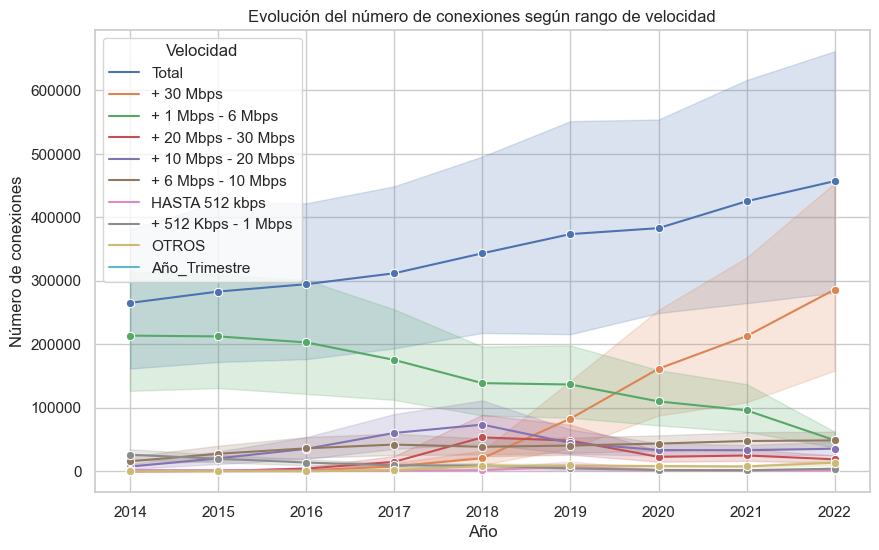

In [108]:
# Generación de variable categórica para mejor manejo de variables
df_melt = acceso_rangos_velocidad_de_bajada_y_provincia.melt(
    id_vars=['Año', 'Trimestre', 'Provincia'],
    var_name='Velocidad',
    value_name='Total'
    ).sort_values(by=['Año', 'Trimestre', 'Provincia']).reset_index(drop=True)

# Calcula los valores máximos de la variable 'Total' por provincia
max_values = df_melt.groupby('Velocidad')['Total'].max()

# Convertir la columna 'Total' a tipo numérico
df_melt['Total'] = pd.to_numeric(df_melt['Total'], errors='coerce')

# Continuar con el resto del código
max_values = df_melt.groupby('Velocidad')['Total'].max()
sorted_velocidades = max_values.sort_values(ascending=False).index.tolist()
df_melt['Velocidad'] = pd.Categorical(df_melt['Velocidad'], categories=sorted_velocidades, ordered=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Total', hue='Velocidad', data=df_melt, marker='o')
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones según rango de velocidad')
plt.show()


En el análisis exclusivo del conjunto de datos de "Acceso a Internet Fijo por rangos de velocidad de bajada y provincia," se destaca un cambio significativo en la categoría de "+30 Mbps" a partir del año 2018. Este rango de velocidad experimenta un crecimiento constante a lo largo de los trimestres, sugiriendo una tendencia ascendente en la adopción de conexiones de alta velocidad en Argentina. Este fenómeno puede estar asociado con la demanda creciente de servicios y aplicaciones que requieren mayores capacidades de conexión, como streaming de video en alta definición, teletrabajo, y otras actividades en línea cada vez más exigentes.

otro aspecto significativo se observa en el decrecimiento constante de las conexiones en el rango de "+1 Mbps - 6 Mbps". Este fenómeno sugiere una tendencia hacia la disminución en la utilización de velocidades inferiores a 6 Mbps a lo largo del tiempo.
La disminución en las conexiones de velocidad moderada podría ser indicativa de la creciente demanda de servicios que requieren velocidades más altas.

Este cambio en la distribución de velocidades podría estar influenciado por la evolución de las tecnologías de red, la disponibilidad de infraestructuras más avanzadas y la mayor conciencia de los usuarios sobre la importancia de la conectividad de alta velocidad en sus actividades diarias.

Vamos a complementar este analisis,con la visualizacion de las conexiones totales que tuvieron mayor movimiento el la grafica anterior segun la provincia, en este caso velocidad mayores a 30Mbps y entre 1 y 6 Mbps.

### Mayores a 30Mbps

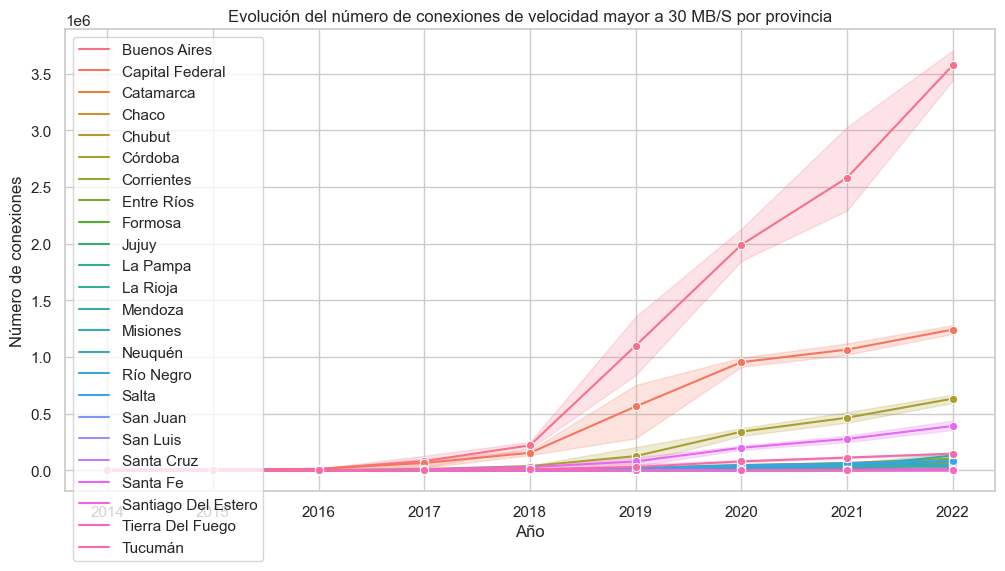

In [118]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(12, 6))


sns.lineplot(x='Año', y='+ 30 Mbps', hue='Provincia', color='orange', data=acceso_rangos_velocidad_de_bajada_y_provincia, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones de velocidad mayor a 30 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

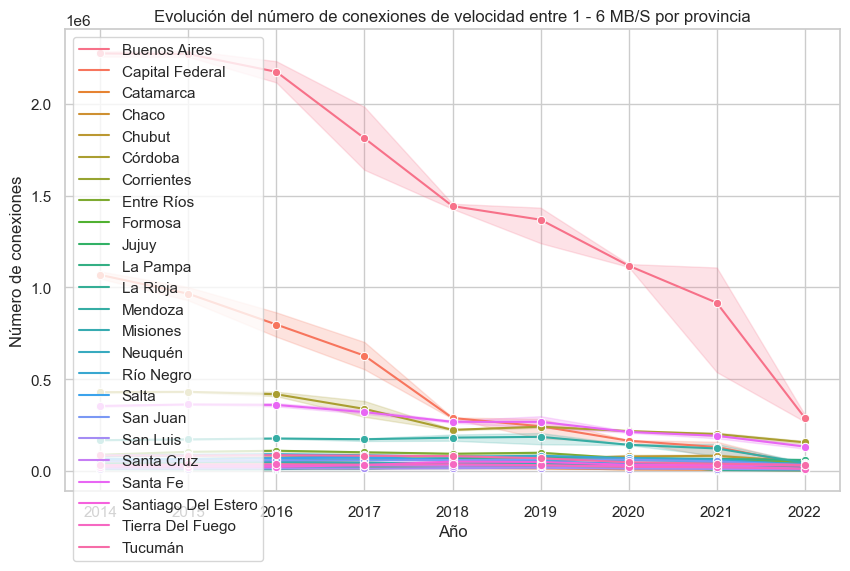

In [121]:
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))


sns.lineplot(x='Año', y='+ 1 Mbps - 6 Mbps', hue='Provincia', color='orange', data=acceso_rangos_velocidad_de_bajada_y_provincia, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones de velocidad entre 1 - 6 MB/S por provincia')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

Con base en las visualizaciones de las conexiones totales con velocidades mayores a 30 Mbps y entre 1 y 6 Mbps, se pueden extraer las siguientes conclusiones:

**Mayores a 30 Mbps:**  

En esta categoría, se observa un punto de inflexión en 2018, marcando un crecimiento constante, especialmente en Buenos Aires, seguido de Capital Federal. Sin embargo, resulta interesante notar un crecimiento significativo en las provincias de Córdoba y Santa Fe. En contraste, el resto de las regiones del país experimentan un aumento más pausado. Esto sugiere que las áreas urbanas, especialmente en Buenos Aires y su área metropolitana, han experimentado un rápido avance en la adopción de conexiones de alta velocidad. Además, el crecimiento en Córdoba y Santa Fe puede indicar una extensión de estas tecnologías a otras áreas urbanas importantes.

**Entre 1 y 6 Mbps:**   

En contraste, las conexiones con velocidades entre 1 y 6 Mbps muestran un decrecimiento a lo largo del tiempo, principalmente en Buenos Aires y Capital Federal, seguidos nuevamente por Córdoba y Santa Fe. Este patrón era esperado dado el aumento en la demanda de mayores velocidades para satisfacer las necesidades de trabajo y estudio remoto. La disminución en velocidades menores a 6 Mbps sugiere una transición hacia tecnologías más rápidas y eficientes.

**Conclusiones Generales:**   

Ambas visualizaciones sugieren que las nuevas tecnologías, impulsadas por la creciente demanda de trabajo y estudio remoto, están llevando a un aumento significativo en la adopción de conexiones de alta velocidad, especialmente por encima de 30 Mbps. Este cambio se refleja en el declive de conexiones más lentas, indicando una preferencia y necesidad creciente de velocidades más rápidas para satisfacer las demandas contemporáneas. Este fenómeno puede interpretarse como una adaptación a las necesidades cambiantes de la sociedad hacia una mayor eficiencia y rendimiento en el acceso a internet.

# **Dataset 5:**  
# **Total nacional de accesos a Internet fijo por velocidad de bajada** 

In [122]:
total_nacional_velocidad_de_bajada = pd.read_csv('datasets_cleaned/total_nacional_velocidad_de_bajada.csv')

In [123]:
total_nacional_velocidad_de_bajada.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31981,85668,1075272,1109421,765015,335573,7410902,394282,11208114
1,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
2,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
3,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
4,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794


In [127]:
total_nacional_velocidad_de_bajada.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2018.00,2.50,36298.14,220559.33,3552501.25,903403.61,914736.72,499041.67,2053381.50,122895.25,8337741.97
std,2.62,1.13,44799.88,206489.87,1342734.46,245302.86,481818.58,465819.18,2498904.09,121902.99,1504413.94
min,2014.00,1.00,3489.00,2898.00,1075272.00,289182.00,101127.00,345.00,11595.00,0.00,6272846.00
25%,2016.00,1.75,14749.25,41936.50,2634147.50,788498.25,680369.25,62398.75,27610.00,0.00,7085635.25
50%,2018.00,2.50,32497.00,208301.00,3415018.00,978186.00,811122.50,497575.50,484584.00,155810.00,8228739.50
75%,2020.00,3.25,41038.00,316865.00,4970678.50,1065288.00,1139898.25,635809.75,4099905.00,199011.25,9410039.75
max,2022.00,4.00,241713.00,687619.00,5153437.00,1245333.00,2068087.00,1688748.00,7410902.00,394282.00,11208114.00


La variabilidad en las categorías de velocidad, representada por las desviaciones estándar, indica que existe diversidad en la adopción de velocidades a lo largo del tiempo. Categorías como "Hasta 512 kbps" y "Entre 512 Kbps y 1 Mbps" presentan desviaciones estándar relativamente bajas, indicando una mayor estabilidad en estas velocidades más bajas.

Aunque no se proporciona una descripción específica de las tendencias trimestrales, su inclusión podría ayudar a identificar patrones estacionales o eventos específicos que afecten las velocidades de conexión en ciertos trimestres.

En resumen, los datos sugieren un aumento gradual en las velocidades de conexión a lo largo del tiempo, lo cual es un indicador positivo de mejoras en la infraestructura de red. Este incremento no solo mejora la experiencia del usuario, sino que también responde a las crecientes demandas de ancho de banda asociadas con el uso intensivo de internet en diversas actividades.

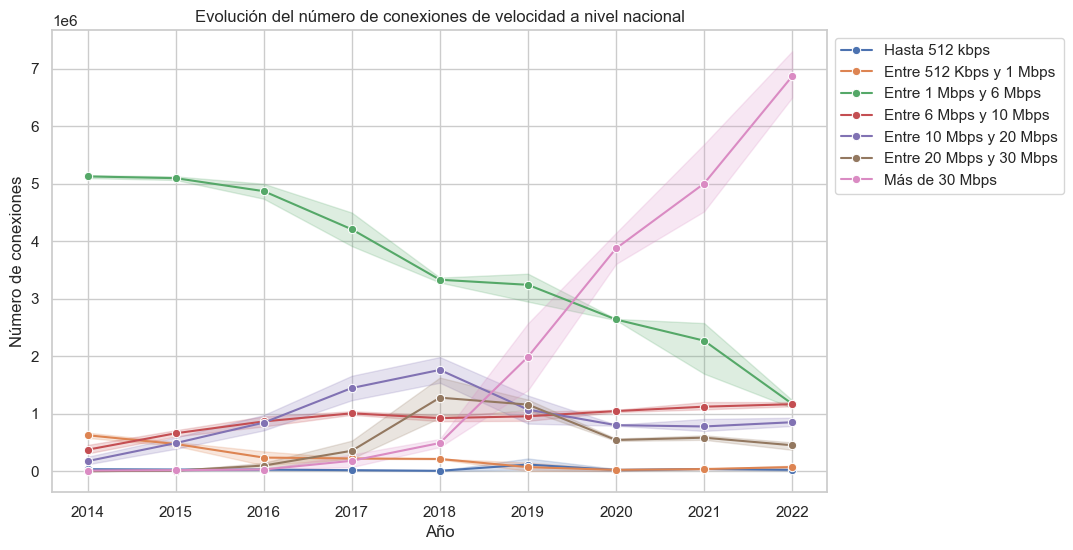

In [138]:
# Estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))

velocidades = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']

for velocidad in velocidades:
    sns.lineplot(x='Año', y=total_nacional_velocidad_de_bajada[velocidad], data=total_nacional_velocidad_de_bajada, marker='o', label=velocidad)

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones de velocidad a nivel nacional')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Al profundizar en el análisis del gráfico que muestra la evolución del número de conexiones de velocidad a nivel nacional, surge claramente la importancia del año 2018 en todos los datos. Este año marca un punto crucial que influyó significativamente en las tendencias de conexión.

En los años previos, se observaba un crecimiento constante en las conexiones, especialmente en las categorías de "Entre 10 y 20 Mbps" y "Entre 6 y 10 Mbps". En 2017, se destacó un interesante despegue en las conexiones de velocidad "Entre 20 y 30 Mbps", colocándose entre las tres conexiones más utilizadas. Sin embargo, como hemos subrayado en varias ocasiones, el año 2018 representó un crecimiento exponencial para las conexiones con "Más de 30 Mbps".

Este aumento abrupto en las conexiones de alta velocidad durante 2018 puede atribuirse a diversos factores, como un acceso más fácil a tecnologías de banda ancha, mejoras en la infraestructura de red o cambios en la demanda del mercado. Este crecimiento parece haber actuado como un punto de quiebre, influyendo en las otras categorías de conexión y generando un ligero decrecimiento anual en estas en los años posteriores.

En resumen, el año 2018 emerge como un punto de inflexión clave, marcando un cambio significativo en la adopción de conexiones de alta velocidad. Este fenómeno no solo ha afectado las conexiones de velocidad más alta, sino que también ha dejado su huella en las demás categorías, influyendo en la dinámica general de la conectividad a nivel nacional.

# **Dataset 6:**  
# **Velocidad media de bajada de Internet fijo por provincia**  

In [142]:
velocidad_media_de_bajada_por_provincia = pd.read_csv('datasets_cleaned/velocidad_media_de_bajada_por_provincia.csv')

In [143]:
velocidad_media_de_bajada_por_provincia.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33


In [144]:
velocidad_media_de_bajada_por_provincia.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.00,864.00,864.00
mean,2018.00,2.50,15.38
std,2.58,1.12,18.32
min,2014.00,1.00,2.57
25%,2016.00,1.75,4.32
50%,2018.00,2.50,7.42
75%,2020.00,3.25,19.71
max,2022.00,4.00,182.86


El análisis detallado de las velocidades medias de bajada en Argentina, expresadas en megabits por segundo (Mbps), ofrece valiosas percepciones sobre la conectividad a lo largo del tiempo. La desviación estándar relativamente alta sugiere una variabilidad significativa en las velocidades medias, que puede atribuirse a diferencias en la infraestructura local, la ubicación geográfica y las preferencias de tecnologías específicas en diversas regiones del país.

El análisis del percentil 75 indica que el 75% de las velocidades medias no superan los 19.71 Mbps, señalando una inclinación general hacia velocidades menos elevadas en la mayoría de las conexiones.

La diversidad en las velocidades se destaca aún más al considerar el rango, que abarca desde un valor mínimo de 2.57 Mbps hasta un máximo de 182.86 Mbps. Este amplio espectro refleja una gama variada de experiencias de conexión, desde conexiones más lentas hasta velocidades excepcionalmente rápidas, subrayando la heterogeneidad de la conectividad en el país.

En resumen, el análisis de las velocidades medias de bajada proporciona una visión integral de la evolución de la conectividad a nivel nacional, mostrando no solo la diversidad, sino también la complejidad de las experiencias de conexión en diferentes partes de Argentina.

## Explorando la Distribución de Datos

diagrama de caja o Boxplot, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

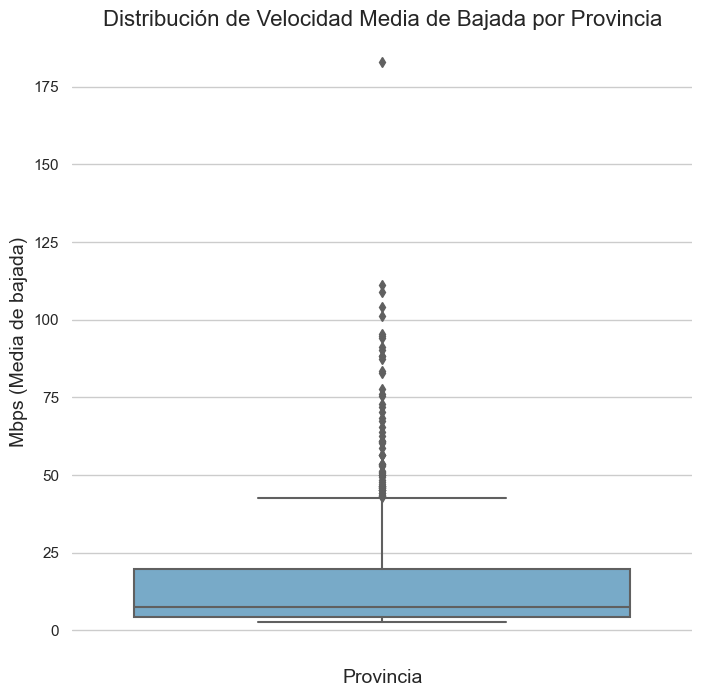

In [151]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data=velocidad_media_de_bajada_por_provincia, y="Mbps (Media de bajada)", palette="Blues")

# Añadir título y etiquetas
plt.title("Distribución de Velocidad Media de Bajada por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=14)
plt.ylabel("Mbps (Media de bajada)", fontsize=14)

# Personalizar la apariencia de las líneas de la caja y los bigotes
sns.set(style="whitegrid", rc={"grid.linestyle": "--"})
sns.despine(left=True, bottom=True)

plt.show()

Notamos la presencia de numerosos valores atípicos en el conjunto de datos que abarca todas las provincias. Dado que hemos reconocido previamente las considerables disparidades entre las provincias, se busca realizar un análisis más detallado. El objetivo es crear boxplots individuales para cada provincia, permitiéndonos identificar y comprender mejor las variaciones significativas que puedan existir en las velocidades medias de bajada.

Al desglosar la información provincia por provincia, buscamos destacar las diferencias sustanciales que podrían estar presentes en la conectividad. Este enfoque nos permitirá visualizar con mayor precisión dónde se concentran las disparidades más notables en términos de velocidades de bajada. En última instancia, la creación de boxplots específicos para cada provincia servirá como una herramienta visual efectiva para discernir patrones y entender la distribución de las velocidades de conexión en el contexto regional.

<Figure size 1600x1000 with 0 Axes>

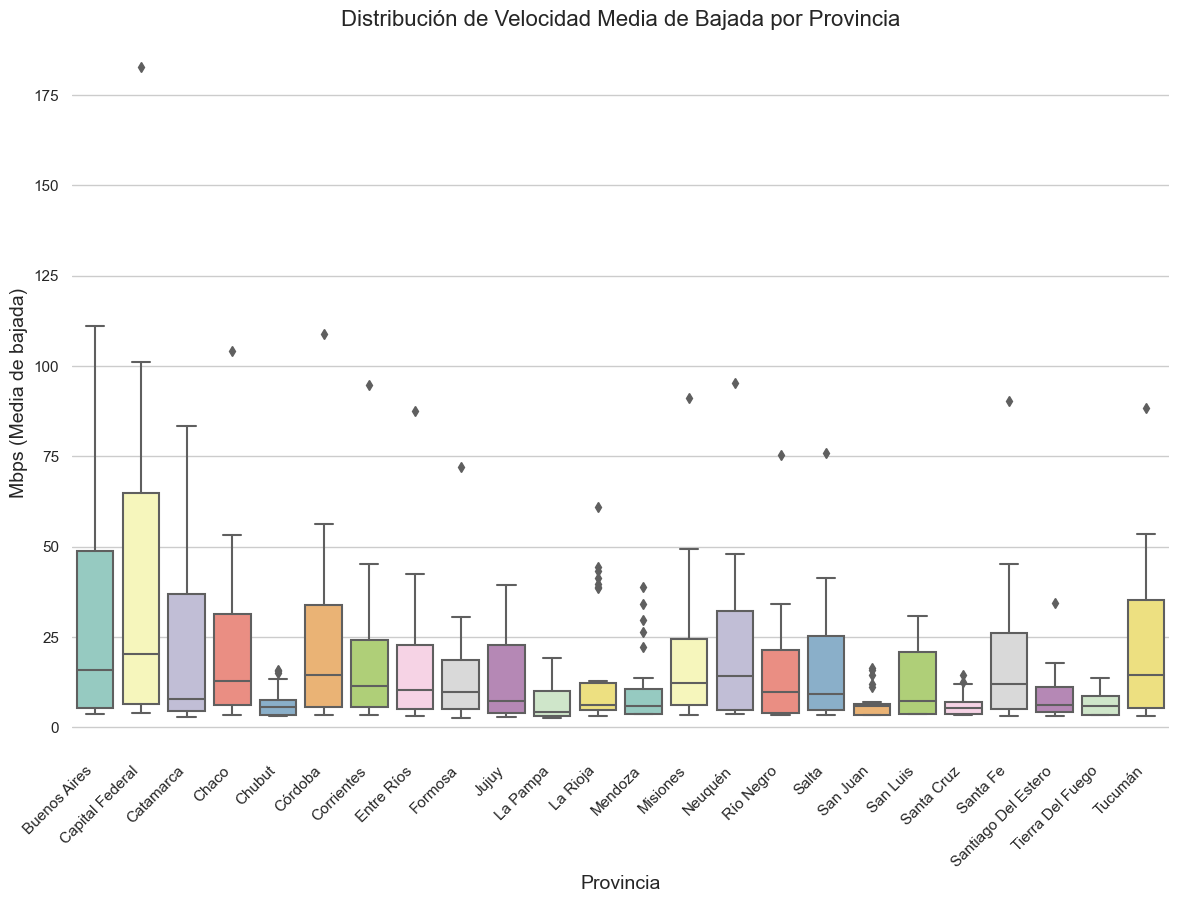

In [155]:
# Estilo de Seaborn
sns.set(style="whitegrid")

# Crear boxplots para cada provincia
plt.figure(figsize=(16, 10))
sns.catplot(x="Provincia", y="Mbps (Media de bajada)", kind="box", data=velocidad_media_de_bajada_por_provincia, height=8, aspect=1.5, palette="Set3")

# Añadir título y etiquetas
plt.title("Distribución de Velocidad Media de Bajada por Provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=14)
plt.ylabel("Mbps (Media de bajada)", fontsize=14)

# Ajustar diseño
plt.xticks(rotation=45, ha="right")
sns.despine(left=True, bottom=True)

plt.show()




Se identifican outliers en todas las provincias, indicando velocidades de bajada que se apartan de la norma en mayor o menor medida. Sin embargo, es crucial destacar que estos valores no pueden considerarse errores, ya que se encuentran dentro de rangos accesibles para cada zona. Al comparar estos outliers entre provincias y con el promedio nacional, se observa que la mayoría se sitúa dentro de los mismos rangos. Esto sugiere que su presencia es más probablemente atribuible a la distribución inherente de los datos, en lugar de representar errores significativos.

Se destaca un outlier en Capital Federal que exhibe una velocidad de bajada por encima de los 175 Mbps. Este valor llama la atención.

# Distribución de Velocidad Media de Bajada en Argentina

Podremos tener una visión panorámica de la distribución de velocidades medias de bajada en conexiones de Internet a lo largo y ancho de Argentina. Al examinar este gráfico, podemos explorar la variabilidad en las velocidades de conexión y obtener percepciones sobre la diversidad de experiencias de conectividad en el país.

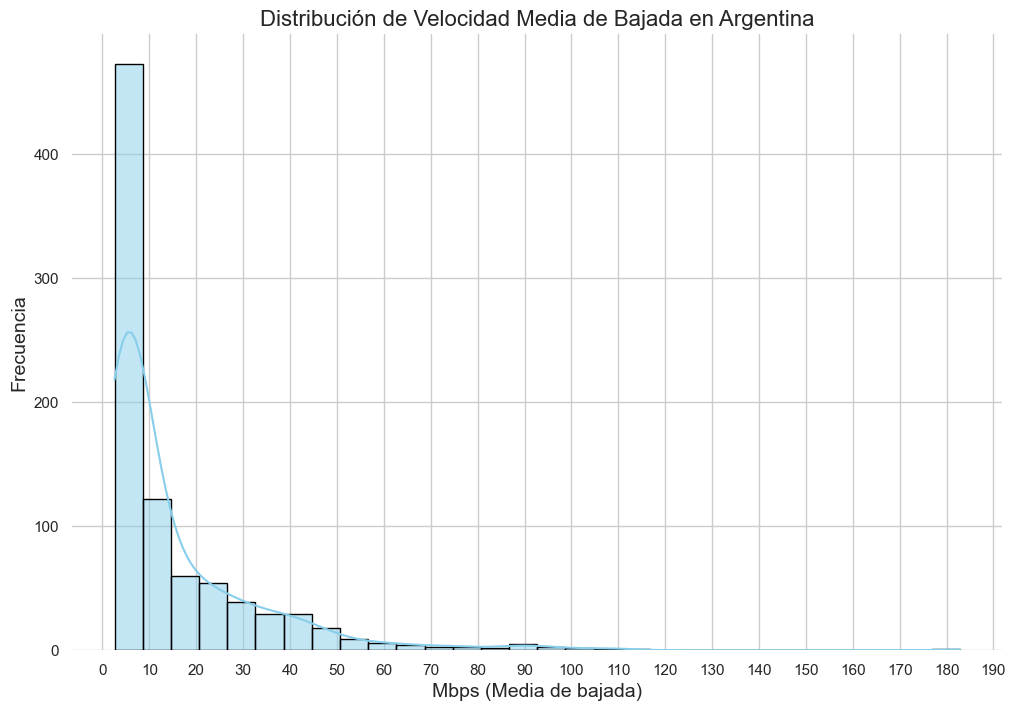

In [159]:
#estilo de Seaborn
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(12, 8))
sns.histplot(data=velocidad_media_de_bajada_por_provincia, x="Mbps (Media de bajada)", kde=True, bins=30, color='skyblue', edgecolor='black')

# Marcar intervalos en el eje x
plt.xticks(range(0, max(velocidad_media_de_bajada_por_provincia["Mbps (Media de bajada)"].astype(int)) + 10, 10))

# Añadir título y etiquetas
plt.title("Distribución de Velocidad Media de Bajada en Argentina", fontsize=16)
plt.xlabel("Mbps (Media de bajada)", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Ajustar diseño
sns.despine(left=True, bottom=True)

plt.show()



El análisis detallado de las velocidades medias de bajada revela una concentración pronunciada de conexiones en el lado izquierdo del histograma, abarcando el rango de 2.57 a 44.64 Mbps. Este fenómeno refleja la prevalencia de velocidades moderadas, siendo las conexiones de 2.57 Mbps las más comunes, con 473 ocurrencias. A medida que avanzamos hacia velocidades más altas, las frecuencias disminuyen gradualmente, indicando que velocidades superiores a 44.64 Mbps son menos comunes. Este patrón sugiere la importancia de abordar las necesidades de conexiones de baja a moderada velocidad para mejorar la accesibilidad y calidad general de Internet en Argentina. El enfoque en estos valores específicos, como 2.57 Mbps, 8.58 Mbps, y 14.59 Mbps, subraya la relevancia de comprender las características particulares de la conectividad para informar estrategias de mejora más efectivas.

Cabe destacar que, en este contexto, surge un valor atípico extraordinariamente alto de 182.86 Mbps, significativamente superior a todo lo demás observado. Este dato, que contrasta con las medianas históricas, podría indicar un posible error o una conexión excepcionalmente rápida que merece una revisión adicional para garantizar la precisión de los datos recopilados.

# **Dataset 8:**  
# **Acceso a Internet fijo por tecnología y provincia**  

In [163]:
acceso_a_internet_fijo_por_tecnologia_y_provincia = pd.read_csv('datasets_cleaned/acceso_a_internet_fijo_por_tecnologia_y_provincia.csv')

In [176]:
acceso_a_internet_fijo_por_tecnologia_y_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Año-Trimestre
0,2022,4,Buenos Aires,325908.00,2767247.00,1499149.00,129910.00,72451.00,4794665.00,2022-4
1,2022,4,Capital Federal,138753.00,1238196.00,138548.00,4603.00,31826.00,1551926.00,2022-4
2,2022,4,Catamarca,8952.00,10998.00,47337.00,1379.00,2243.00,70909.00,2022-4
3,2022,4,Chaco,24582.00,61265.00,47285.00,7957.00,2574.00,143663.00,2022-4
4,2022,4,Chubut,45450.00,73923.00,9815.00,30721.00,8850.00,168759.00,2022-4
...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927.00,100.00,381.00,4092.00,3264.00,26764.00,2014-1
860,2014,1,Santa Fe,322662.00,174296.00,3059.00,5951.00,644.00,506612.00,2014-1
861,2014,1,Santiago Del Estero,32567.00,3598.00,19.00,915.00,34.00,37133.00,2014-1
862,2014,1,Tierra Del Fuego,21618.00,2837.00,648.00,1.00,2934.00,28038.00,2014-1


In [166]:
acceso_a_internet_fijo_por_tecnologia_y_provincia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.00,864.00,864.00,864.00,864.00,864.00,864.00,864.00
mean,2018.00,2.50,125545.71,173991.31,32623.31,10720.80,6228.97,349110.10
std,2.58,1.12,252051.42,427631.33,132542.98,18723.09,10740.93,749485.37
min,2014.00,1.00,6120.00,0.00,0.00,0.00,2.00,12557.00
25%,2016.00,1.75,22320.25,8912.50,205.25,261.00,313.00,52329.00
50%,2018.00,2.50,48161.00,34984.00,1233.00,4377.00,1862.50,104596.50
75%,2020.00,3.25,102547.00,71683.25,15642.50,12673.75,7128.00,180174.50
max,2022.00,4.00,1586343.00,2767247.00,1499149.00,129910.00,73415.00,4794665.00


El análisis de los datos muestra una evolución en la preferencia de tipos de conexión a Internet en Argentina entre 2014 y 2022. Aunque ADSL y Cablemódem han sido opciones históricamente sólidas, la Fibra óptica ha experimentado un crecimiento significativo, convirtiéndose en una opción cada vez más popular. La tecnología inalámbrica también ha tenido presencia, aunque en menor medida.

Para obtener un panorama más completo de las tendencias de conexión a Internet en Argentina, nos centraremos en la columna "Total" y realizaremos un análisis agrupado por año. Esta estrategia nos permitirá obtener una visión más holística a nivel nacional, identificando patrones generales de crecimiento y preferencias tecnológicas a lo largo del tiempo.

In [167]:
# Generación de variable categorica para mejor manejo de variables
nacional_tec = acceso_a_internet_fijo_por_tecnologia_y_provincia.drop(columns=['Total']).melt(id_vars = ['Año', 'Trimestre', 'Provincia'], var_name = 'tecnologia', value_name = "total").sort_values(by = ['Año', 'Trimestre', 'Provincia']).reset_index(drop=True)


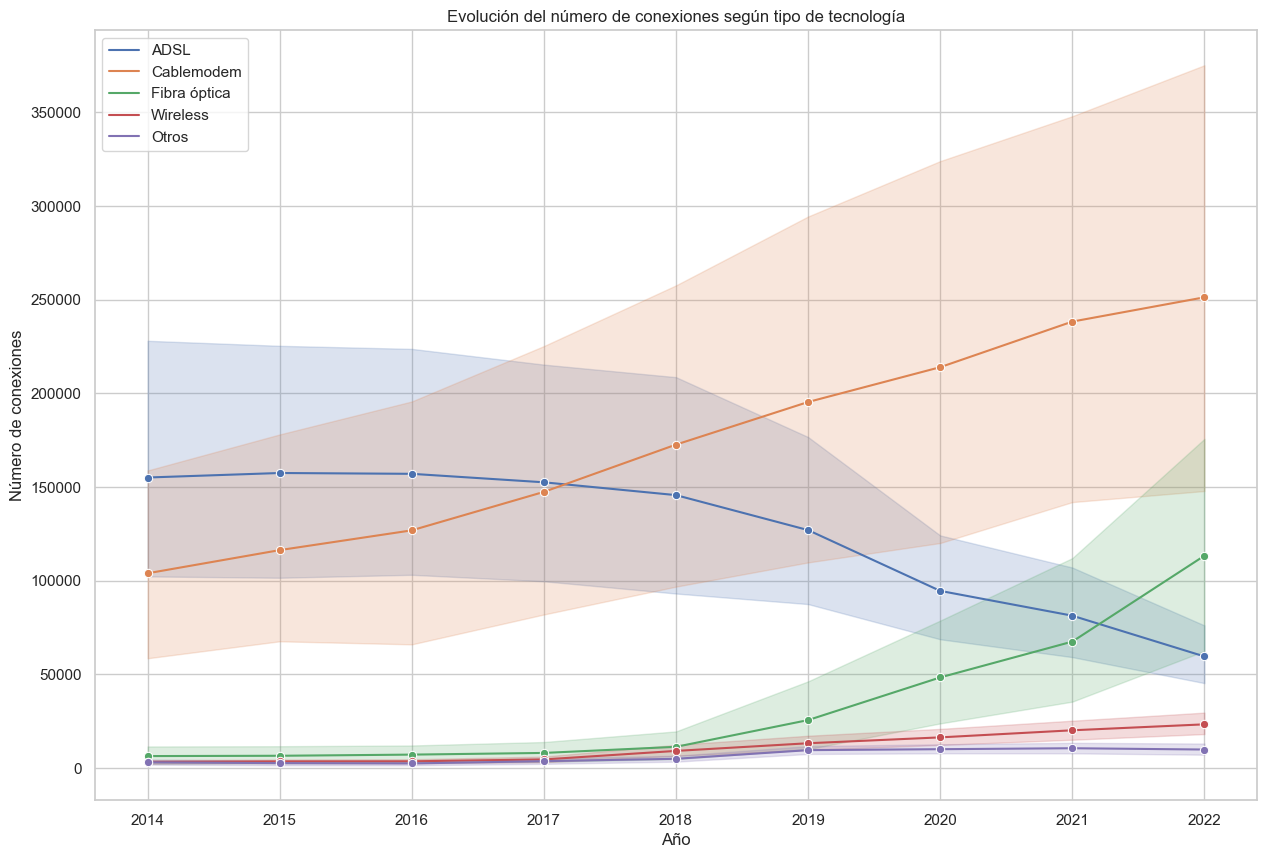

In [170]:
# Estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(15, 10))

# Utilizar sns.lineplot para trazar el gráfico
sns.lineplot(x='Año', y='total', hue='tecnologia', data=nacional_tec, marker='o')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Número de conexiones')
plt.title('Evolución del número de conexiones según tipo de tecnología')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

# Mostrar el gráfico
plt.show()


En el análisis de la evolución de las conexiones a nivel nacional, se destacan varias tendencias significativas. El cablemódem emerge como la tecnología dominante, mostrando un crecimiento constante desde 2014 y superando a otras tecnologías en número de conexiones. Por otro lado, la fibra óptica experimenta un crecimiento sustancial a partir de 2018, convirtiéndose en una opción cada vez más popular.

Es interesante observar la clara correlación entre la evolución de las conexiones y las velocidades de Internet. El aumento en el uso de tecnologías más avanzadas como la fibra óptica se refleja en un crecimiento paralelo en las velocidades de conexión, sugiriendo una demanda creciente de mayores velocidades.

El cruce significativo en 2017 entre cablemódem y ADSL indica un cambio en las preferencias de los usuarios, donde el cablemódem experimenta un aumento considerable, mientras que ADSL disminuye. Este cruce podría ser un indicador de la transición de tecnologías más antiguas a opciones más modernas y veloces.

Además, la amplitud de crecimiento, evidenciada por las sombras en los trimestres, señala una mayor variabilidad y dispersión en la adopción de tecnologías a lo largo del tiempo. Este fenómeno podría deberse a factores estacionales o eventos específicos que influyen en la adopción de nuevas tecnologías en diferentes momentos del año.

Ahora vamos a analizar el panorama por provincia:

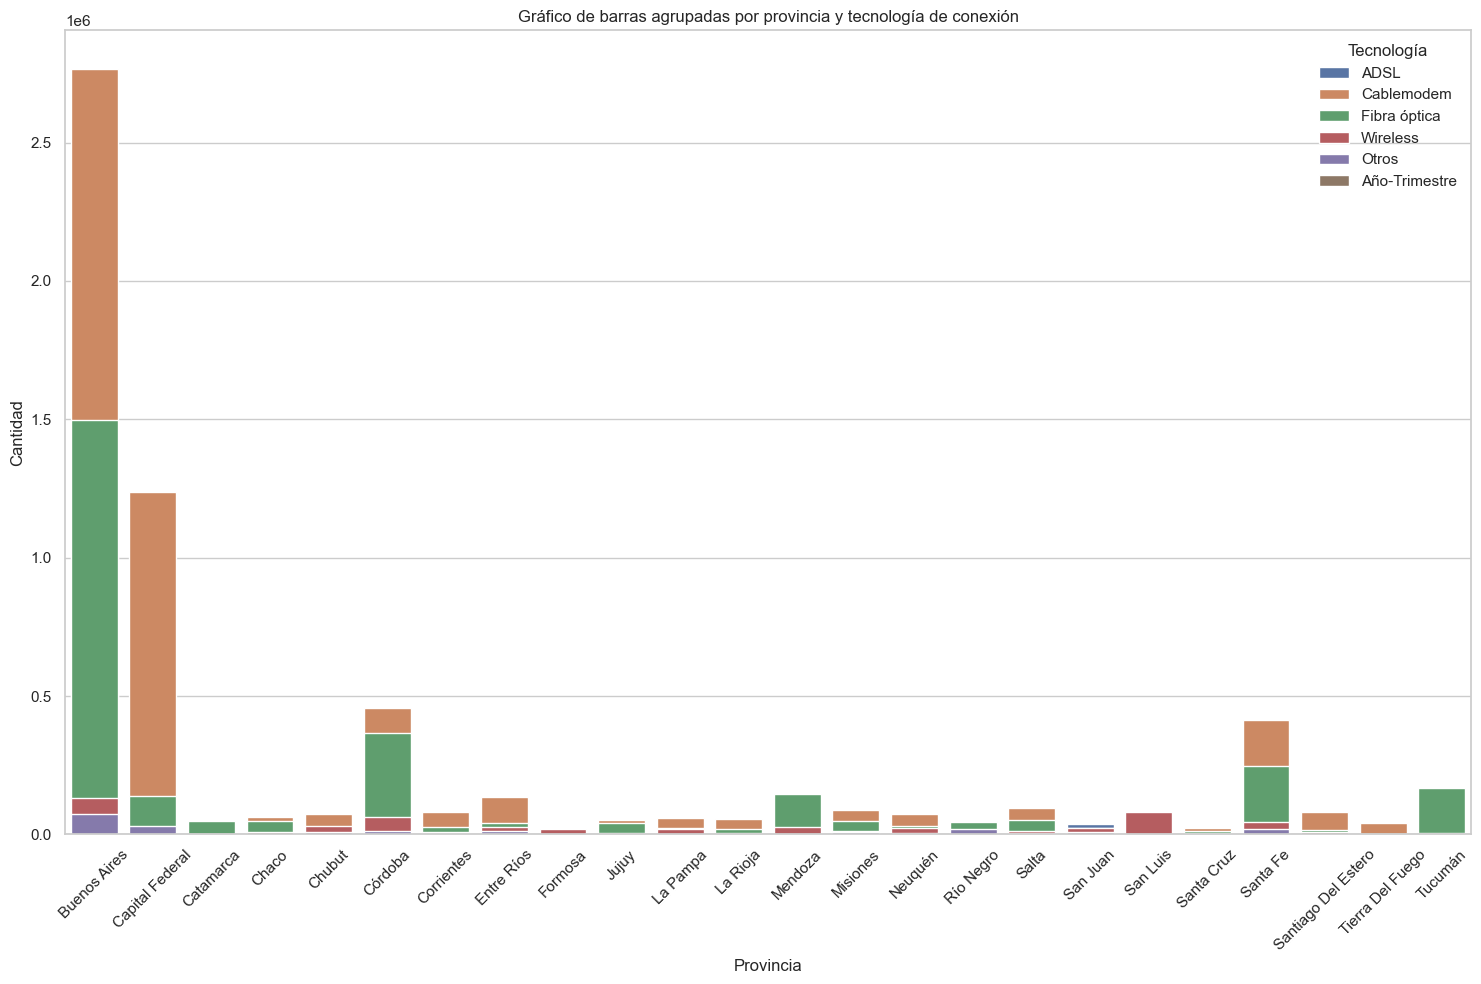

In [305]:
# Filtrar datos para el año 2022 y trimestre 4
mask = (acceso_a_internet_fijo_por_tecnologia_y_provincia['Año'] == 2022) & (acceso_a_internet_fijo_por_tecnologia_y_provincia['Trimestre'] == 4)
data_2022 = acceso_a_internet_fijo_por_tecnologia_y_provincia[mask]

# Eliminar columnas innecesarias
data_2022 = data_2022.drop(columns=['Año', 'Trimestre', 'Total'])

# Derretir el DataFrame para facilitar la visualización
nacional_melt = pd.melt(data_2022, id_vars='Provincia', var_name='Tecnología', value_name='Cantidad')

# Convertir la columna 'Cantidad' a tipo numérico, eliminando posibles valores no numéricos
nacional_melt['Cantidad'] = pd.to_numeric(nacional_melt['Cantidad'], errors='coerce')
nacional_melt = nacional_melt[nacional_melt['Cantidad'] != '2022-4']

# Convertir la columna 'Cantidad' a tipo numérico
nacional_melt['Cantidad'] = pd.to_numeric(nacional_melt['Cantidad'])

# Visualizar el gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='Provincia', y='Cantidad', hue='Tecnología', data=nacional_melt, dodge=False)
plt.title('Gráfico de barras agrupadas por provincia y tecnología de conexión')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [304]:
nacional_melt

,Provincia,Tecnología,Cantidad
0,Buenos Aires,ADSL,325908.00
1,Capital Federal,ADSL,138753.00
2,Catamarca,ADSL,8952.00
3,Chaco,ADSL,24582.00
4,Chubut,ADSL,45450.00
...,...,...,...
139,Santa Cruz,Año-Trimestre,NaN
140,Santa Fe,Año-Trimestre,NaN
141,Santiago Del Estero,Año-Trimestre,NaN
142,Tierra Del Fuego,Año-Trimestre,NaN


En el análisis inicial, se destaca claramente la predominancia de las tecnologías de cablemódem y fibra óptica. Sin embargo, se observa un dato interesante en las provincias de Mendoza y Tucumán, donde la tecnología de fibra óptica muestra una marcada superioridad, superando considerablemente a las demás tecnologías y casi anulando su presencia.

Como era de esperarse, las provincias más pobladas, como Buenos Aires, Capital Federal, Córdoba y Santa Fe, se destacan como los principales consumidores de diversas tecnologías de conexión a Internet. Este patrón refleja la tendencia común de las áreas urbanas más grandes como centros de mayor adopción de tecnologías avanzadas de comunicación.

Además, se destaca la contraparte en provincias como Formosa y Santa Cruz, donde las barras correspondientes a las distintas tecnologías son casi imperceptibles. Esto sugiere una menor adopción o disponibilidad de servicios de conexión a Internet en comparación con las provincias más pobladas. La disparidad en la presencia de estas tecnologías resalta las diferencias en la infraestructura de conectividad entre las distintas regiones del país

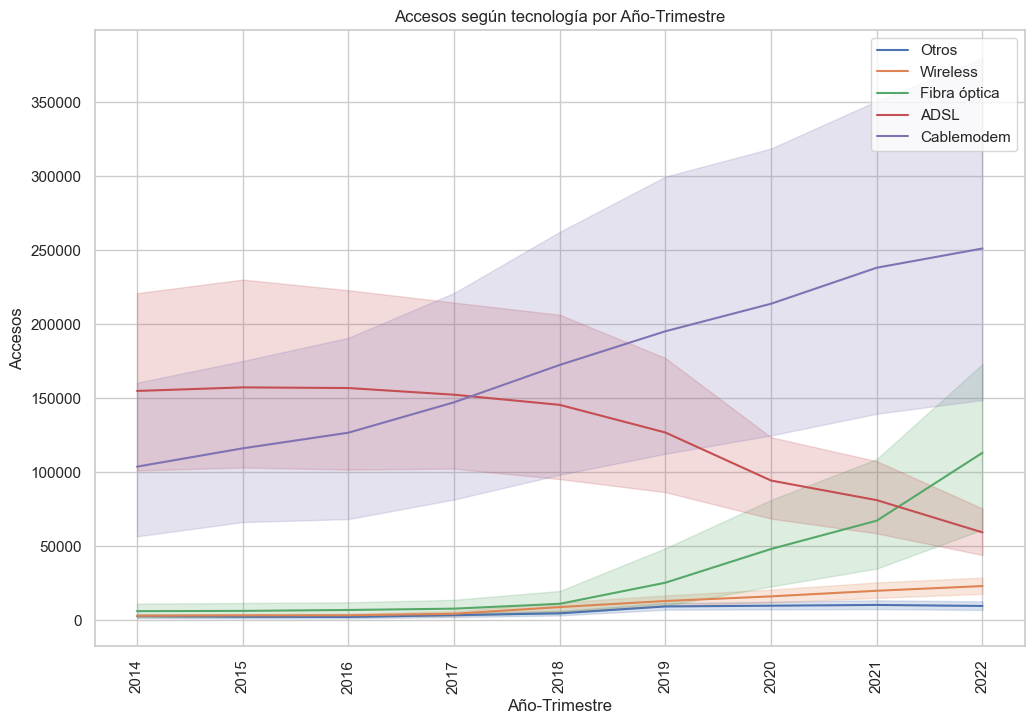

In [201]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de líneas
sns.lineplot(x="Año", y="Otros", data=acceso_a_internet_fijo_por_tecnologia_y_provincia, label="Otros")
sns.lineplot(x="Año", y="Wireless", data=acceso_a_internet_fijo_por_tecnologia_y_provincia, label="Wireless")
sns.lineplot(x="Año", y="Fibra óptica", data=acceso_a_internet_fijo_por_tecnologia_y_provincia, label="Fibra óptica")
sns.lineplot(x="Año", y="ADSL", data=acceso_a_internet_fijo_por_tecnologia_y_provincia, label="ADSL")
sns.lineplot(x="Año", y="Cablemodem", data=acceso_a_internet_fijo_por_tecnologia_y_provincia, label="Cablemodem")

# Personalizar el título y las etiquetas de los ejes
plt.title("Accesos según tecnología por Año-Trimestre")
plt.xlabel("Año-Trimestre")
plt.ylabel("Accesos")

# Girar etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

A lo largo del periodo comprendido entre 2014 y 2022, la tecnología "Cablemodem" se ha destacado como una presencia constante y dominante en el mercado de conexiones a Internet. Su crecimiento ha sido uniforme, evidenciando una aceptación continua por parte de los usuarios. Este tipo de conexión, conocido por su velocidad, ha mantenido su posición predominante, en parte debido a su oferta conjunta con servicios de televisión por cable, aprovechando la infraestructura compartida para la transmisión de datos y entretenimiento.

En contraste, la tecnología "ADSL" ha experimentado un descenso constante a lo largo del tiempo. Este declive puede atribuirse a diversas limitaciones, como velocidades más bajas, costos relativamente altos y la necesidad de una infraestructura extensa.

A partir del 2018, se ha observado un cambio significativo en la dinámica de crecimiento de la tecnología "Fibra óptica". Esta tecnología ha experimentado un aumento sustancial en su adopción, evidenciado por una pendiente más pronunciada en su crecimiento. La "Fibra óptica" se presenta como una tendencia emergente en el mercado de conexiones a Internet, superando limitaciones asociadas a la velocidad y costos presentes en otras tecnologías.

En cuanto a las categorías "Otros" y "Wireless", se ha registrado un aumento gradual a lo largo del tiempo, aunque este crecimiento ha sido menos pronunciado en comparación con otras tecnologías. Este fenómeno puede atribuirse al desarrollo continuo y la adopción de soluciones inalámbricas, así como a la introducción de otras tecnologías emergentes en el mercado, contribuyendo de manera paulatina a su incremento.



# **Dataset 9:**  
# **Total nacional de accesos a Internet fijo por tipo de tecnología**  

In [211]:
total_nacional_por_tipo_de_tecnologia = pd.read_csv('./datasets_cleaned/total_nacional_por_tipo_de_tecnologia_excel.csv')

In [212]:
total_nacional_por_tipo_de_tecnologia.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022


In [213]:
total_nacional_por_tipo_de_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2018.00,2.50,2992507.36,4175791.56,803549.19,257299.17,149495.22,8378642.50
std,2.62,1.13,872143.57,1249103.93,866095.48,180164.59,85534.50,1462264.83
min,2014.00,1.00,1315373.00,2407330.00,139187.00,70749.00,54300.00,6398398.00
25%,2016.00,1.75,2251404.00,3001010.50,168088.00,85113.25,64404.25,7093767.00
50%,2018.00,2.50,3539331.50,4138156.00,236825.50,220224.00,116147.00,8228739.50
75%,2020.00,3.25,3722975.00,5287469.25,1205959.00,415332.75,247467.25,9410039.75
max,2022.00,4.00,3803024.00,6073426.00,3060575.00,572969.00,265328.00,11208114.00


## Explorando la Distribución de Datos

diagrama de caja o Boxplot, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

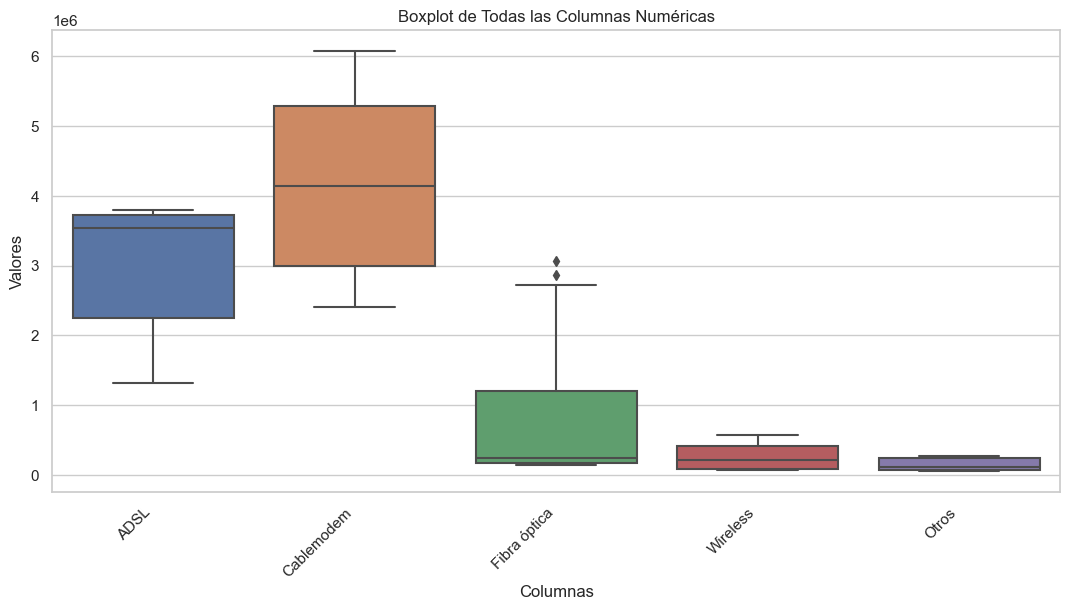

In [221]:
# Estilo
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(13, 6))

columns = ['Año', 'Trimestre', 'Total']

# Crear el boxplot con todas las columnas numéricas
sns.boxplot(data=total_nacional_por_tipo_de_tecnologia.drop(columns, axis=1))

# Personalizar el título y las etiquetas de los ejes
plt.title("Boxplot de Todas las Columnas Numéricas")
plt.xlabel("Columnas")
plt.ylabel("Valores")

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()



La exploración detallada de los datos revela patrones significativos en el panorama de las tecnologías de conexión a Internet en Argentina. En primer lugar, el claro predominio de la tecnología de Cablemodem se destaca como la opción más utilizada, evidenciando su posición consolidada en el mercado.

Por otro lado, la tecnología de Fibra Óptica, aunque presenta algunos valores atípicos, ha experimentado un crecimiento sustancial desde el tercer trimestre de 2018. Es importante señalar que estos valores atípicos están por debajo de las medianas de Cablemodem y ADSL, lo que sugiere que, aunque puede haber fluctuaciones, la Fibra Óptica está ganando terreno como una opción de conexión más popular.

En contraste, la tecnología ADSL muestra una tendencia a la baja constante a lo largo del tiempo. Este declive podría atribuirse a limitaciones en la velocidad y la emergencia de tecnologías más avanzadas y eficientes, como la Fibra Óptica.

Las tecnologías categorizadas como "Wireless" y "Otros" han experimentado un crecimiento gradual, pero constante, en sintonía con el aumento general en la categoría "Total". Aunque su adopción es constante, no alcanza los niveles de popularidad observados en tecnologías como Cablemodem y Fibra Óptica.

En resumen, estos hallazgos ofrecen una visión integral de las preferencias de conexión a Internet en Argentina, destacando la necesidad de adaptarse a tecnologías más modernas y eficientes, especialmente aquellas como la Fibra Óptica que muestran un crecimiento acelerado y prometedor en el mercado.

# **Dataset 10:**   
# **Ingresos por la operación del servicio de Internet fijo**  

Exploraremos el dataset referente a los "Ingresos por la operación del servicio de Internet fijo". Este conjunto de datos proporciona información trimestral sobre los ingresos generados por la prestación del servicio de Internet fijo. Además, con el objetivo de obtener una visión integral del panorama, integraremos conjuntos de datos adicionales que abarcan ingresos trimestrales por servicios de televisión y telefonía fija. La inclusión de estos datos complementarios nos permitirá realizar comparaciones significativas y obtener una comprensión más profunda de la dinámica financiera en el sector de las telecomunicaciones. Estos datos han sido recopilados y compartidos por ENACOM (Ente Nacional de Comunicaciones), proporcionando una fuente confiable y oficial para llevar a cabo nuestro análisis. A través de este estudio, buscamos identificar patrones, tendencias y posibles correlaciones que arrojen luz sobre el desempeño económico de los servicios de Internet fijo y sus interacciones con servicios relacionados.

In [4]:
internet_fijo = pd.read_csv('datasets_cleaned/ingresos_por_operacion_del_servicio.csv')

In [5]:
television = pd.read_csv('datasets_cleaned/Television.csv')

In [13]:
telefonia_fija = pd.read_excel('datasets_cleaned/telefonia_fija.xlsx',sheet_name='Fija_ingresos')

In [14]:
internet_fijo.head(3)

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,4,72443482
1,2022,3,64086784
2,2022,2,60419500


In [15]:
telefonia_fija.head(3)

,Año,Trimestre,Ingresos (miles de $)
0,2014,1,2916071.754
1,2014,2,2974865.204
2,2014,3,3105462.022


In [19]:
television.head(3)

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,4,"62.432.903,15","29.721.126,94"
1,2022,3,"52.399.891,49","27.073.190,89"
2,2022,2,"46.322.065,49","23.559.484,83"


In [20]:
television.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Año                                        36 non-null     int64 
 1   Trimestre                                  36 non-null     int64 
 2   Ingresos TV por suscripción  (miles de $)  36 non-null     object
 3   Ingresos TV satelital (miles de $)         36 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


In [21]:
television.columns

Index(['Año', 'Trimestre', 'Ingresos TV por suscripción  (miles de $)',
       'Ingresos TV satelital (miles de $)'],
      dtype='object')

In [22]:
# Eliminar los puntos de las columnas
television['Ingresos TV por suscripción  (miles de $)'] = television['Ingresos TV por suscripción  (miles de $)'].str.replace(".", "")
television['Ingresos TV satelital (miles de $)'] = television['Ingresos TV satelital (miles de $)'].str.replace(".", "")
television['Ingresos TV por suscripción  (miles de $)'] = television['Ingresos TV por suscripción  (miles de $)'].str.replace(",", ".")
television['Ingresos TV satelital (miles de $)'] = television['Ingresos TV satelital (miles de $)'].str.replace(",", ".")
# Convertir las columnas a tipo numérico
television['Ingresos TV por suscripción  (miles de $)'] = pd.to_numeric(television['Ingresos TV por suscripción  (miles de $)'])
television['Ingresos TV satelital (miles de $)'] = pd.to_numeric(television['Ingresos TV satelital (miles de $)'])


In [23]:
television.head()

,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,4,62432903.15,29721126.94
1,2022,3,52399891.49,27073190.89
2,2022,2,46322065.49,23559484.83
3,2022,1,42113438.81,21268086.24
4,2021,4,38273391.80,18038065.44


In [29]:
# Fusionar los conjuntos de datos utilizando 'Año' y 'Trimestre' como claves de fusión
df_final = internet_fijo.merge(television, on=['Año', 'Trimestre'], how='outer').merge(telefonia_fija, on=['Año', 'Trimestre'], how='outer')

In [31]:
df_final.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),Ingresos (miles de $)
0,2022,4,72443482,62432903.15,29721126.94,3.235691e+07
1,2022,3,64086784,52399891.49,27073190.89,2.969851e+07
2,2022,2,60419500,46322065.49,23559484.83,3.125818e+07
3,2022,1,55219313,42113438.81,21268086.24,3.058334e+07
4,2021,4,45467887,38273391.80,18038065.44,4.061606e+07


In [32]:
# Renombrar la columna
df_final.rename(columns={'Ingresos (miles de $)': 'ingresos_telefoniafija'}, inplace=True)
df_final.rename(columns={'Ingresos (miles de pesos)': 'ingresos_internet'}, inplace=True)

In [33]:
df_final.head()

,Año,Trimestre,ingresos_internet,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $),ingresos_telefoniafija
0,2022,4,72443482,62432903.15,29721126.94,3.235691e+07
1,2022,3,64086784,52399891.49,27073190.89,2.969851e+07
2,2022,2,60419500,46322065.49,23559484.83,3.125818e+07
3,2022,1,55219313,42113438.81,21268086.24,3.058334e+07
4,2021,4,45467887,38273391.80,18038065.44,4.061606e+07


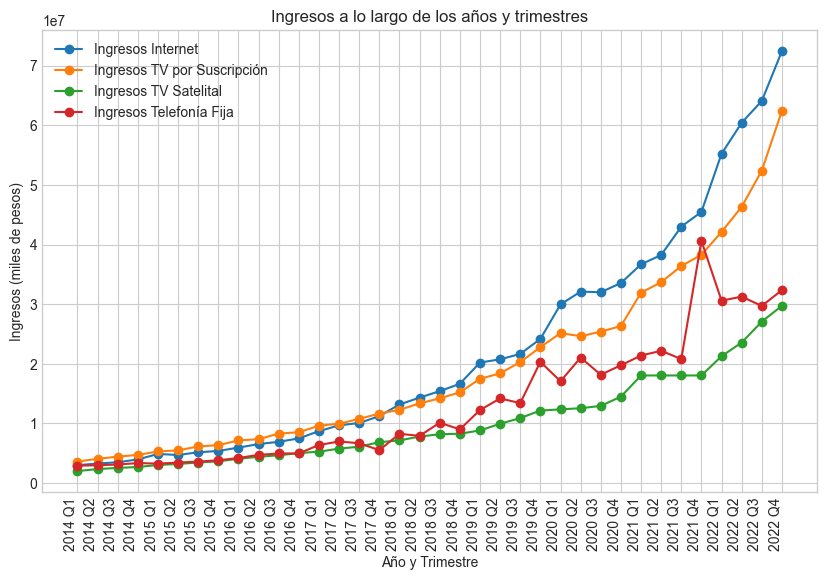

In [41]:
# Concatenar 'Año' y 'Trimestre'
df_final['Año_Trimestre'] = df_final['Año'].astype(str) + ' Q' + df_final['Trimestre'].astype(str)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_final['Año_Trimestre'], df_final['ingresos_internet'], label='Ingresos Internet', marker='o')
plt.plot(df_final['Año_Trimestre'], df_final['Ingresos TV por suscripción  (miles de $)'], label='Ingresos TV por Suscripción', marker='o')
plt.plot(df_final['Año_Trimestre'], df_final['Ingresos TV satelital (miles de $)'], label='Ingresos TV Satelital', marker='o')
plt.plot(df_final['Año_Trimestre'], df_final['ingresos_telefoniafija'], label='Ingresos Telefonía Fija', marker='o')

# Configurar el gráfico
plt.title('Ingresos a lo largo de los años y trimestres')
plt.xlabel('Año y Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend()

# Invertir el eje x
plt.gca().invert_xaxis()

# Rotar los ticks del eje x a 45 grados
plt.xticks(rotation=90, ha='right')

# Establecer el fondo blanco
plt.style.use('seaborn-whitegrid')

plt.show()



Desde finales de 2017 hasta principios de 2018, se observa un periodo de crecimiento continuo en el sector de las telecomunicaciones, donde los ingresos de los diferentes servicios se mantenían en un rango relativamente estrecho. Durante este periodo, los ingresos por TV por suscripción e Internet fijo mostraban cifras prácticamente equiparables, mientras que los ingresos por telefonía fija se asemejaban a los de la TV satelital.

Sin embargo, a partir de este punto, se evidencia un notorio aumento en la brecha entre los diversos servicios. El ingreso por Internet fijo experimenta un destacado crecimiento, superando significativamente al segundo servicio en la lista, la TV por suscripción. Este cambio podría deberse a la influencia de nuevas tecnologías y plataformas de transmisión en línea, como Netflix, Disney Plus y Star Plus, así como a las estrategias implementadas por las compañías de cable nacionales.

En contraste, la TV satelital, aunque mantiene un crecimiento constante, no logra alcanzar la misma prominencia que otros servicios en el análisis. Este patrón sugiere que, a pesar de su expansión, la TV satelital podría enfrentar desafíos en términos de popularidad entre los usuarios.

Este análisis resalta la dinámica cambiante de las preferencias de los usuarios en el sector de las telecomunicaciones, evidenciando un claro desplazamiento hacia servicios más modernos y versátiles, como Internet fijo y TV por suscripción, en detrimento de opciones más tradicionales como la telefonía fija.

A continuación, procederemos a un análisis más detallado del dataset de ingresos por el servicio de Internet fijo, utilizando gráficos de caja (**boxplots**) para visualizar la distribución de los datos y detectar posibles valores atípicos.

## Explorando la Distribución de Datos

diagrama de caja o Boxplot, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

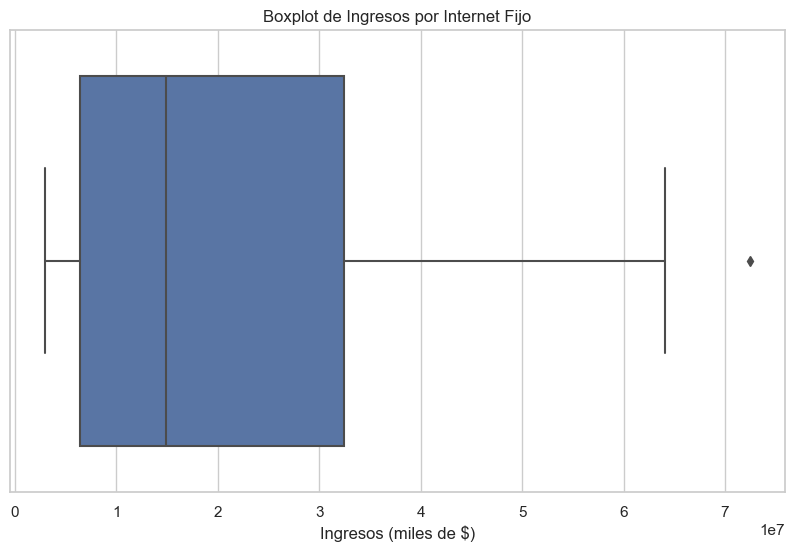

In [267]:
# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot para la variable deseada
sns.boxplot(x=internet_fijo['Ingresos (miles de pesos)'])

# Personalizar el título y las etiquetas de los ejes
plt.title("Boxplot de Ingresos por Internet Fijo")
plt.xlabel("Ingresos (miles de $)")

# Mostrar el gráfico
plt.show()


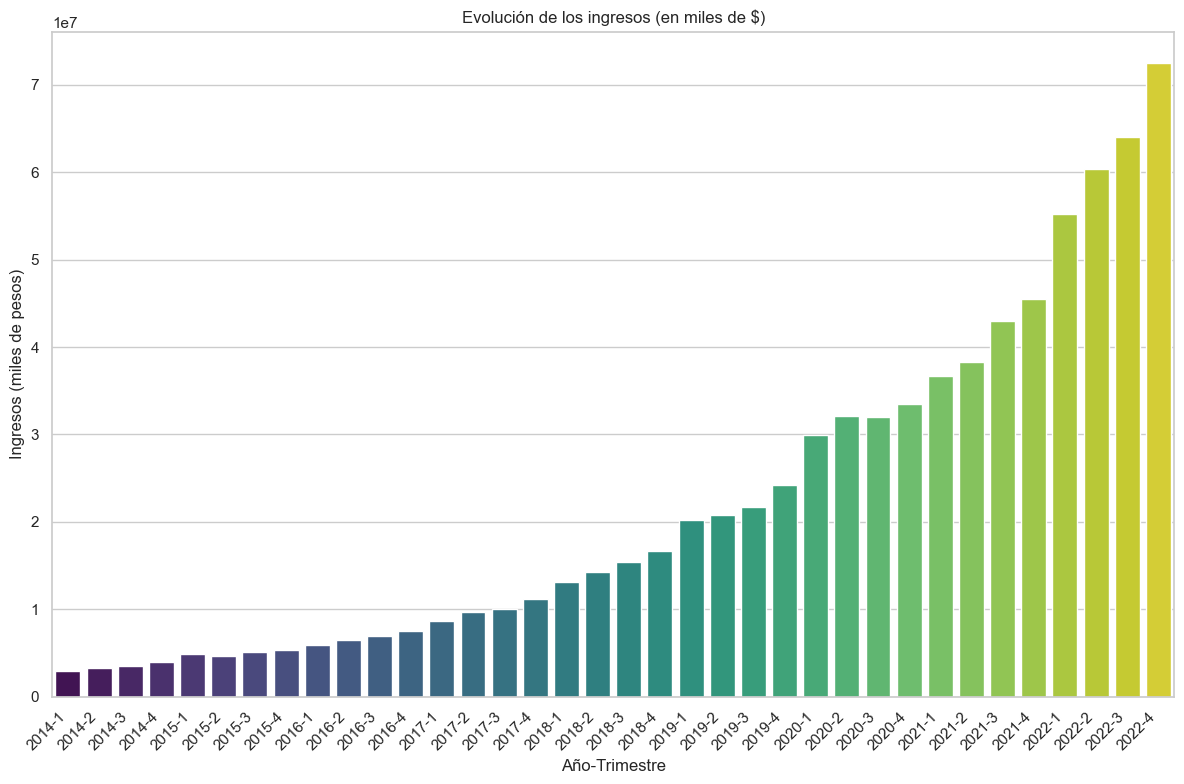

In [272]:
# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre".
internet_fijo['Año-Trimestre'] = (internet_fijo['Año'].astype(str)+ '-' + internet_fijo['Trimestre'].astype(str))

# Ordenar el DataFrame por la columna 'Año-Trimestre'
internet_fijo = internet_fijo.sort_values(by='Año-Trimestre')
                                
# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
ax = sns.barplot(x="Año-Trimestre", y='Ingresos (miles de pesos)', data=internet_fijo, palette="viridis")

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Personalizar el título y las etiquetas de los ejes
plt.title("Evolución de los ingresos (en miles de $)")
plt.xlabel("Año-Trimestre")
plt.ylabel('Ingresos (miles de pesos)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La evolución de los ingresos en el tiempo muestra un aumento constante, reflejando una tendencia de crecimiento continuo. Aunque se identifica un valor atípico en el último trimestre de la serie, es importante contextualizar este fenómeno antes de considerarlo como un error o anomalía.

En el contexto nacional, factores económicos como la inflación y la tasa de cambio peso-dólar pueden desempeñar un papel significativo en la variabilidad de los ingresos. La inflación, por ejemplo, puede afectar el poder adquisitivo de los consumidores y, por ende, influir en la demanda de servicios, mientras que las fluctuaciones en la tasa de cambio pueden impactar los costos asociados a la operación.

Además, a nivel empresarial, es esencial considerar los costos fijos y variables que podrían estar afectando la situación financiera. Aumentos en los costos fijos, como salarios y alquileres, así como variaciones en los costos variables asociados a la infraestructura y mantenimiento de servicios, podrían influir en la dinámica de ingresos.

# **Dataset 13:**  
# **Velocidad media de bajada de Internet (nacional)** 

In [273]:
velocidad_media_de_bajada_nacional = pd.read_csv('datasets_cleaned/velocidad_media_de_bajada_nacional.csv')

In [274]:
velocidad_media_de_bajada_nacional.head(3)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,106.56,Oct-Dic 2022
1,2022,3,62.46,Jul-Sept 2022
2,2022,2,58.44,Abr-Jun 2022


In [314]:
velocidad_media_de_bajada_nacional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 35 to 0
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
 4   Año-Trimestre           36 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ KB


## Explorando la Distribución de Datos

diagrama de caja o Boxplot, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

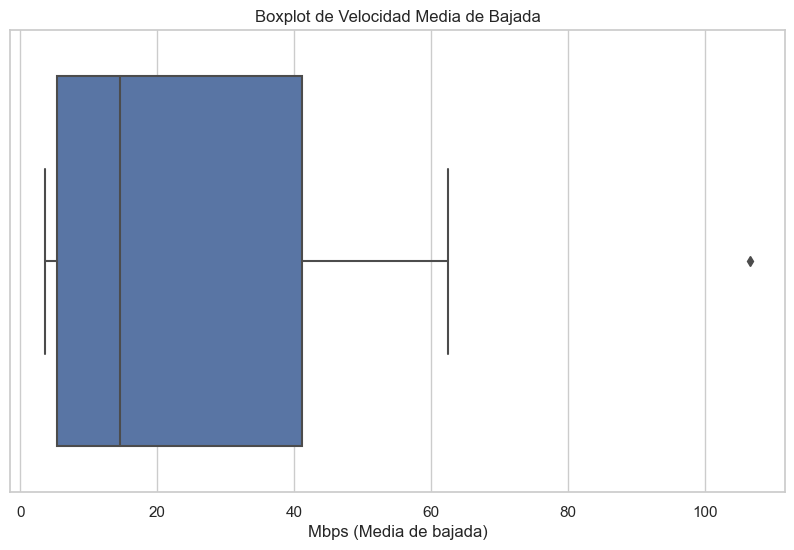

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x=velocidad_media_de_bajada_nacional['Mbps (Media de bajada)'])

# Personalizar el título y las etiquetas de los ejes
plt.title("Boxplot de Velocidad Media de Bajada")
plt.xlabel("Mbps (Media de bajada)")

# Mostrar el gráfico
plt.show()

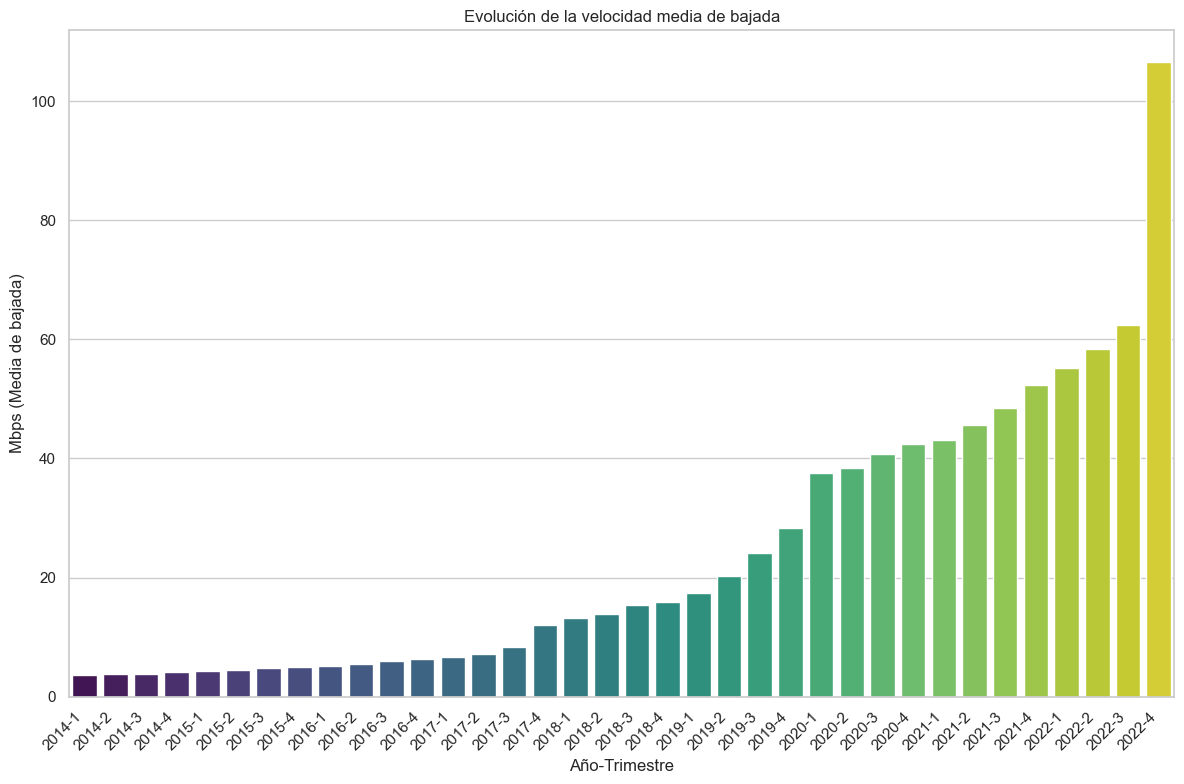

In [277]:
# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre".
velocidad_media_de_bajada_nacional['Año-Trimestre'] = (
    velocidad_media_de_bajada_nacional['Año'].astype(str) 
    + '-' + velocidad_media_de_bajada_nacional['Trimestre'].astype(str)
)

# Ordenar el DataFrame por la columna 'Año-Trimestre'
velocidad_media_de_bajada_nacional = velocidad_media_de_bajada_nacional.sort_values(by='Año-Trimestre')

# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
ax = sns.barplot(x="Año-Trimestre", y='Mbps (Media de bajada)', data=velocidad_media_de_bajada_nacional, palette="viridis")

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Personalizar el título y las etiquetas de los ejes
plt.title("Evolución de la velocidad media de bajada")
plt.xlabel("Año-Trimestre")
plt.ylabel('Mbps (Media de bajada)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La discrepancia notada en el último dato registrado para el cuarto trimestre de 2022 ha llamado nuestra atención durante el análisis de datos. Este valor, que casi duplica la magnitud del trimestre anterior, representa una anomalía significativa y plantea interrogantes sobre su validez. Dada la falta de respaldo en una fuente de datos adicional o documentación en línea, hemos decidido impugnar este dato y abordar la situación mediante una estimación más fundamentada.

Dado el crecimiento abrupto y poco común observado en la velocidad media de bajada, hemos optado por explorar la posibilidad de realizar una estimación utilizando métodos basados en la tendencia histórica de los datos. En particular, planeamos aplicar un modelo ARIMA (AutoRegressive Integrated Moving Average) para prever el valor del cuarto trimestre de 2022. Este enfoque nos permitirá obtener una estimación más precisa y coherente con la evolución previa de la serie temporal, ayudándonos a mitigar la discrepancia identificada y proporcionar una visión más realista de la situación.

Continuaremos con la implementación del modelo ARIMA, ajustando sus parámetros según sea necesario, para obtener una predicción confiable del valor correspondiente al cuarto trimestre de 2022.

In [285]:
from statsmodels.tsa.arima.model import ARIMA

# Dato que deseas excluir
datos_excluir = velocidad_media_de_bajada_nacional[
    (velocidad_media_de_bajada_nacional['Año'] == 2022) & 
    (velocidad_media_de_bajada_nacional['Trimestre'] == 4)
]

# Nueva serie temporal sin el dato a excluir
datos_sin_excluir = velocidad_media_de_bajada_nacional.drop(datos_excluir.index)

# Concatenar las columnas "Año" y "Trimestre" en una nueva columna "Año-Trimestre"
datos_sin_excluir['Año-Trimestre'] = (
    datos_sin_excluir['Año'].astype(str) 
    + '-' + datos_sin_excluir['Trimestre'].astype(str)
)

# Convertir la serie temporal a un formato de fecha
datos_sin_excluir['Fecha'] = pd.to_datetime(datos_sin_excluir['Año-Trimestre'])

# Seleccionar solo las columnas relevantes para el modelo ARIMA
datos_arima = datos_sin_excluir[['Fecha', 'Mbps (Media de bajada)']]

# Configurar el índice de fecha
datos_arima = datos_arima.set_index('Fecha')

# Ajustar un modelo ARIMA
modelo_arima = ARIMA(datos_arima, order=(5,1,0))  # Puedes ajustar los parámetros del modelo según sea necesario
resultados_arima = modelo_arima.fit()

# Obtener el índice de la última fecha en los datos
ultimo_indice = datos_arima.index[-1]

# Obtener la predicción para el cuarto trimestre de 2022
prediccion_2022_T4 = resultados_arima.predict(start=len(datos_arima), end=len(datos_arima) + 2, dynamic=True)

# Crear un índice de fechas para la predicción
fechas_prediccion = pd.date_range(start=ultimo_indice + pd.DateOffset(months=1), periods=3, freq='M')

# Crear un DataFrame con las predicciones y agregarlo a la serie temporal original
prediccion_df = pd.DataFrame({'Mbps (Media de bajada)': prediccion_2022_T4}, index=fechas_prediccion)
datos_arima_pred = datos_arima.append(prediccion_df)

In [286]:
prediccion_2022_T4.iloc[0]

65.40598102870963

Reemplazamos esta prediccion en nuestra data original y procedemos a graficar nuevamente. 

In [287]:
# Obtener el índice del dato a reemplazar
indice_reemplazar = velocidad_media_de_bajada_nacional[
    (velocidad_media_de_bajada_nacional['Año'] == 2022) & 
    (velocidad_media_de_bajada_nacional['Trimestre'] == 4)
].index[0]

# Reemplazar el dato en el DataFrame original
velocidad_media_de_bajada_nacional.loc[indice_reemplazar, 'Mbps (Media de bajada)'] = prediccion_2022_T4.iloc[0]


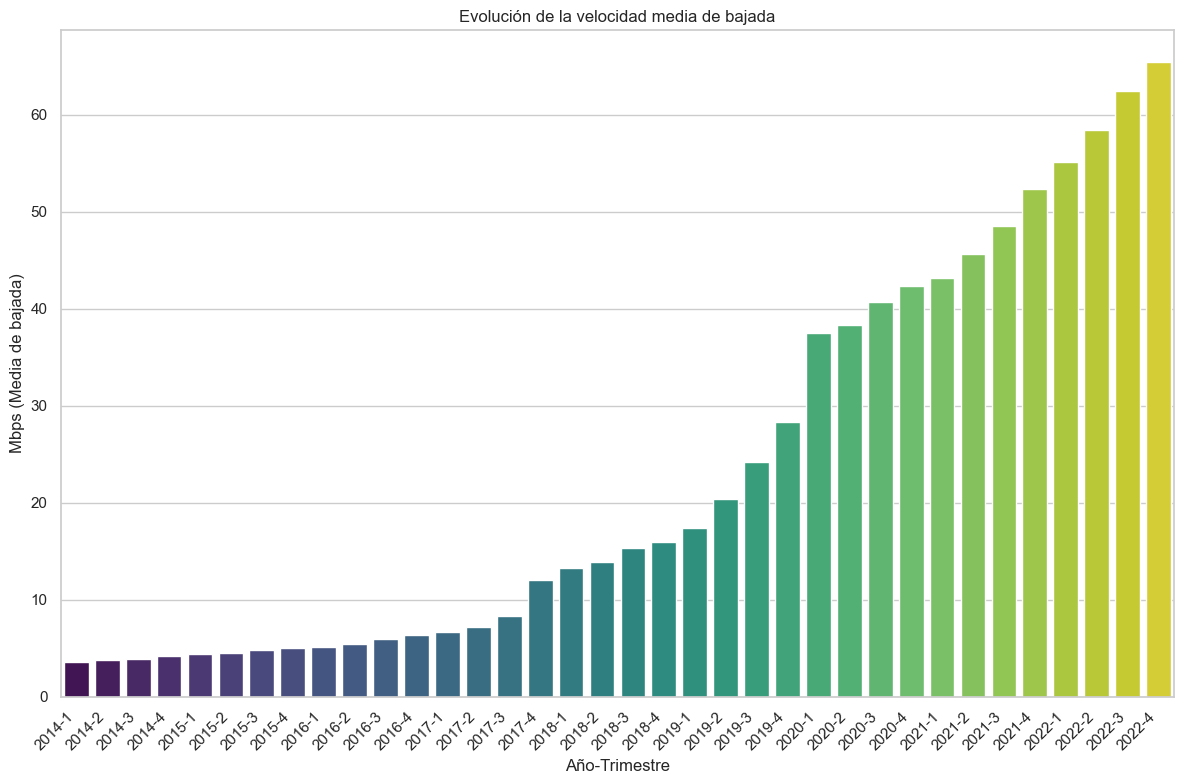

In [290]:
# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
ax = sns.barplot(x="Año-Trimestre", y='Mbps (Media de bajada)', data=velocidad_media_de_bajada_nacional, palette="viridis")

# Rotar las etiquetas del eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Personalizar el título y las etiquetas de los ejes
plt.title("Evolución de la velocidad media de bajada")
plt.xlabel("Año-Trimestre")
plt.ylabel('Mbps (Media de bajada)')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [296]:
# Calcular la media anual
media_anual = velocidad_media_de_bajada_nacional.groupby('Año-Trimestre')['Mbps (Media de bajada)'].mean().reset_index()

# Renombrar las columnas si es necesario
media_anual.columns = ['Año-Trimestre', 'Media Trimestral']

media_anual


,Año-Trimestre,Media Trimestral
0,2014-1,3.62
1,2014-2,3.76
2,2014-3,3.87
3,2014-4,4.16
4,2015-1,4.35
5,2015-2,4.55
6,2015-3,4.79
7,2015-4,4.99
8,2016-1,5.08
9,2016-2,5.42


Desde su inicio en 2014, se evidencia un crecimiento constante en esta métrica, señalando una mejora progresiva en la calidad de los servicios de conexión. Este crecimiento continuo sugiere una adaptación y actualización constante de las tecnologías y la infraestructura subyacente.

Una observación particularmente interesante es la aceleración en el crecimiento a partir del año 2019. Este período marca un cambio notable en la tasa de aumento de la velocidad media de bajada, indicando posiblemente avances tecnológicos, inversiones significativas en infraestructura o cambios en las estrategias de servicio por parte de los proveedores de Internet.

Sin embargo, dentro de este patrón general de crecimiento, se destacan momentos específicos de cambios abruptos. El cuarto trimestre de 2017 y el primer trimestre de 2018 son ejemplos notables de períodos en los que se registró un aumento sustancial en la velocidad media de bajada. Estos eventos pueden estar asociados con despliegues importantes de nuevas tecnologías, como la implementación de redes de fibra óptica o mejoras significativas en la capacidad de las redes existentes.

A partir de 2020, observamos cierta estabilidad en el crecimiento, con tasas de aumento más moderadas. Este período puede reflejar la consolidación de las mejoras implementadas en años anteriores y la entrada en una fase de optimización y refinamiento de los servicios.

Este análisis de la velocidad media de bajada no solo proporciona una perspectiva histórica, sino que también sirve como base para la toma de decisiones estratégicas. Comprender la evolución de esta métrica es esencial para anticipar las demandas del mercado, planificar inversiones en infraestructura y adaptar las ofertas de servicios para satisfacer las expectativas cambiantes de los usuarios. La conectividad rápida y confiable es fundamental en la era digital, y este análisis contribuye a la comprensión integral de cómo evoluciona y responde a las demandas del entorno tecnológico y del usuario.

# **Dataset 14:**  
# **Accesos a banda ancha y banda angosta por provincia**  

In [300]:
accesos_a_banda_ancha_y_banda_angosta_por_provincia = pd.read_csv('datasets_cleaned/accesos_a_banda_ancha_y_banda_angosta_por_provincia.csv')

In [309]:
accesos_a_banda_ancha_y_banda_angosta_por_provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.00,4794665
1,2022,4,Capital Federal,1549781,2145.00,1551926
2,2022,4,Catamarca,70908,1.00,70909
3,2022,4,Chaco,143658,5.00,143663
4,2022,4,Chubut,167855,904.00,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.00,26764
860,2014,1,Santa Fe,506000,612.00,506612
861,2014,1,Santiago Del Estero,37124,9.00,37133
862,2014,1,Tierra Del Fuego,27272,766.00,28038


In [302]:
accesos_a_banda_ancha_y_banda_angosta_por_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


<Figure size 1200x600 with 0 Axes>

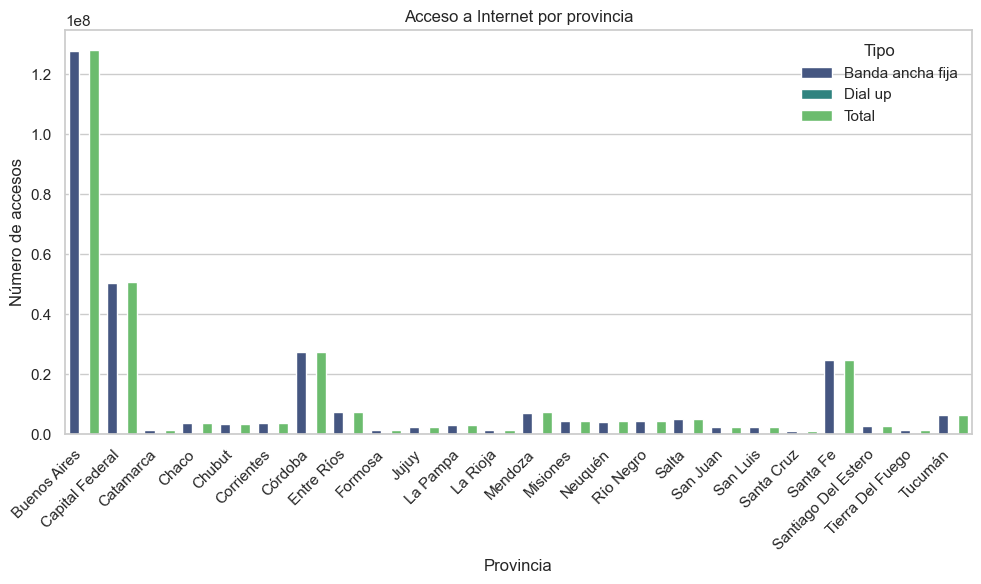

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

total_provincias = accesos_a_banda_ancha_y_banda_angosta_por_provincia.groupby('Provincia').sum().reset_index().drop(columns=['Año', 'Trimestre'])

total_provincias_stacked = total_provincias.set_index('Provincia').stack().reset_index()
total_provincias_stacked.columns = ['Provincia', 'Tipo', 'Número de acceso']

# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y='Número de acceso', hue='Tipo', data=total_provincias_stacked, palette="viridis")

# dar nombre a los ejes y titulo
plt.xlabel("Provincia")
plt.ylabel("Número de accesos")
plt.title("Acceso a Internet por provincia")
plt.legend(title="Tipo", loc="upper right")

plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


En el análisis del dataset que muestra los accesos a banda ancha y banda angosta por provincia, se destaca claramente la abrumadora prevalencia de conexiones de banda ancha en comparación con las conexiones de tipo dial-up. Este patrón se observa consistentemente en todas las provincias, donde las conexiones de banda ancha representan la gran mayoría, dejando a las conexiones de dial-up en una proporción prácticamente imperceptible en el gráfico.

Al profundizar en la distribución provincial de estos accesos, se destaca la marcada diferencia entre Buenos Aires y el resto de las provincias. Buenos Aires lidera el mercado con una considerable brecha, seguido por Capital Federal, que tiene menos de la mitad de conexiones que Buenos Aires. A continuación, se encuentran Córdoba y Santa Fe, que, aunque significativas, aún están considerablemente por debajo de las dos primeras.

En el extremo opuesto, provincias como Catamarca, Santa Cruz y Tierra del Fuego muestran una presencia mínima de conexiones de banda ancha y prácticamente nula de dial-up. Esto sugiere una disparidad significativa en la adopción de tecnologías de conexión a Internet entre diferentes regiones del país.

Estos hallazgos resaltan la importancia de considerar las variaciones regionales al analizar datos relacionados con las conexiones a Internet, ya que la infraestructura y la disponibilidad de servicios pueden variar considerablemente de una provincia a otra

Nos centraremos en el comportamiento a lo largo del tiempo de los accesos a Internet por provincia, distinguiendo entre conexiones de banda ancha y dial-up, mediante **gráfico de lineas**. Estos gráficos nos proporcionarán una visión detallada de cómo ha evolucionado la diferentes tecnologías de acceso a Internet en las distintas regiones de Argentina. Prestaremos especial atención a la dominancia de la banda ancha en comparación con las conexiones dial-up, así como a las variaciones regionales que puedan surgir en este contexto.

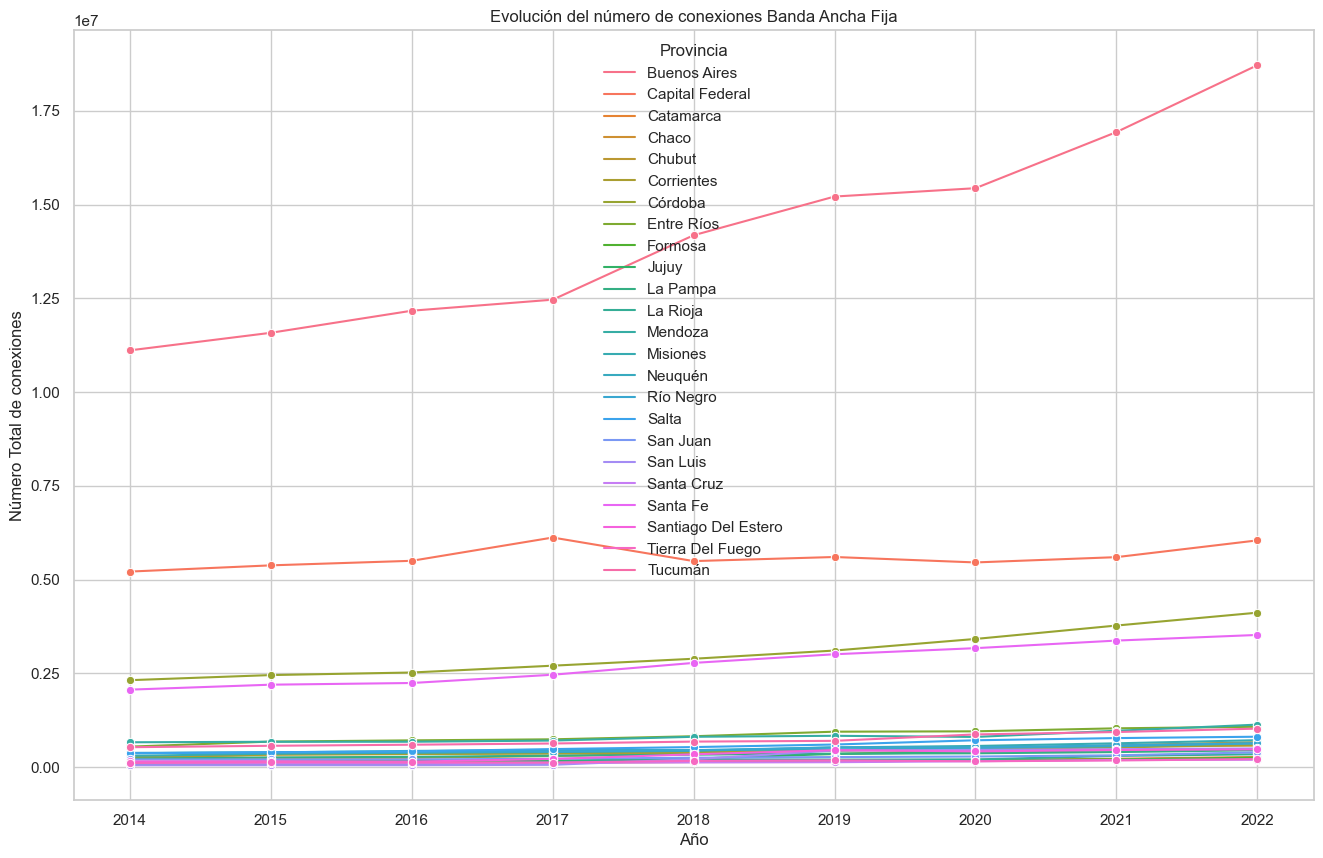

In [312]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

data_años = accesos_a_banda_ancha_y_banda_angosta_por_provincia.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

ax1 = sns.lineplot(x='Año', y='Banda ancha fija', hue='Provincia', data=data_años, marker='o')

plt.xlabel('Año')
plt.ylabel('Número Total de conexiones')
plt.title('Evolución del número de conexiones Banda Ancha Fija')

plt.show()

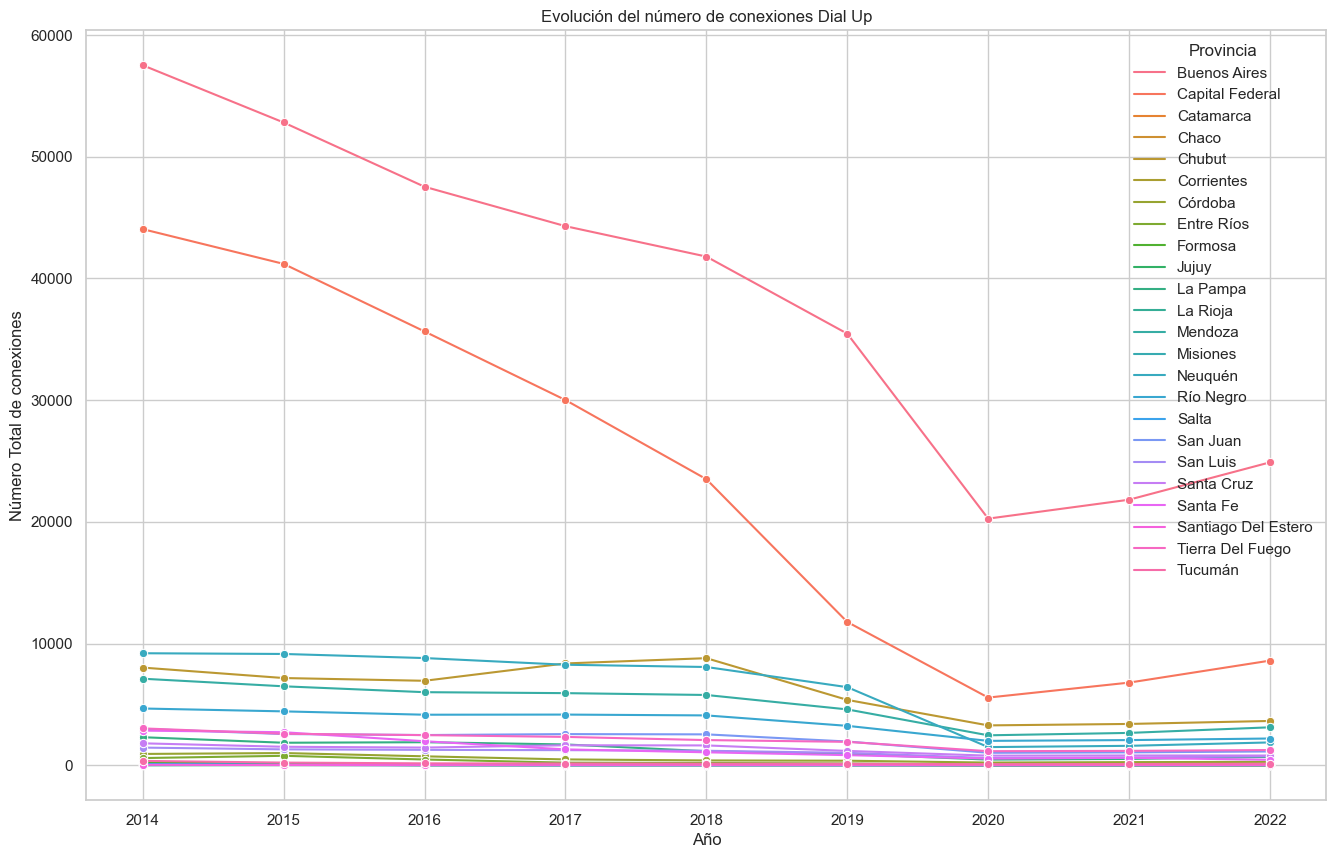

In [313]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

data_años = accesos_a_banda_ancha_y_banda_angosta_por_provincia.groupby(['Provincia','Año']).sum().drop(columns=['Trimestre'])

ax1 = sns.lineplot(x='Año', y='Dial up', hue='Provincia', data=data_años, marker='o')

plt.xlabel('Año')
plt.ylabel('Número Total de conexiones')
plt.title('Evolución del número de conexiones Dial Up')

plt.show()

Los gráficos detallan de manera elocuente el cambio de preferencia de Dial-up a Banda Ancha. Este cambio tecnológico refleja no solo la búsqueda de conexiones más rápidas sino también la adaptación a tecnologías más eficientes y modernas. La narrativa numérica nos sumerge en esta evolución, proporcionando una comprensión más profunda de cómo los argentinos han adoptado y adaptado las tecnologías de Internet.

Al observar las cifras provinciales, se revelan disparidades notables. Buenos Aires y Capital Federal lideran en conexiones, planteando preguntas sobre los motivos detrás de estas diferencias regionales. ¿Es la infraestructura, la densidad poblacional o los factores socioeconómicos los que impulsan estas variaciones? Este enfoque regional añade matices a nuestro análisis, invitándonos a explorar más allá de los números.

Este análisis, más allá de ser un simple recuento de conexiones, nos invita a reflexionar sobre los desafíos y oportunidades en el panorama tecnológico argentino. Al abordar las disparidades regionales y explorar las motivaciones detrás de las elecciones tecnológicas, este análisis se convierte en un punto de partida para comprender las complejidades sociales y económicas entrelazadas con la tecnología.

# **Dataset 15:**   
# Total nacional de accesos a Internet fijo por banda ancha y banda angosta

In [297]:
nacional_por_banda_ancha_y_banda_angosta = pd.read_csv('datasets_cleaned/nacional_por_banda_ancha_y_banda_angosta.csv')

In [298]:
nacional_por_banda_ancha_y_banda_angosta.head(3)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11195668,12446,11208114,Oct-Dic 2022
1,2022,3,11078691,12437,11091128,Jul-Sept 2022
2,2022,2,10946248,12436,10958684,Abr-Jun 2022


In [299]:
nacional_por_banda_ancha_y_banda_angosta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


## Explorando la Distribución de Datos

diagrama de caja o Boxplot, obtendremos una visión rápida y efectiva de la distribución de un conjunto de datos. Este tipo de gráfico condensa información clave, revelando detalles sobre la centralidad, dispersión y la presencia de valores atípicos en los datos.

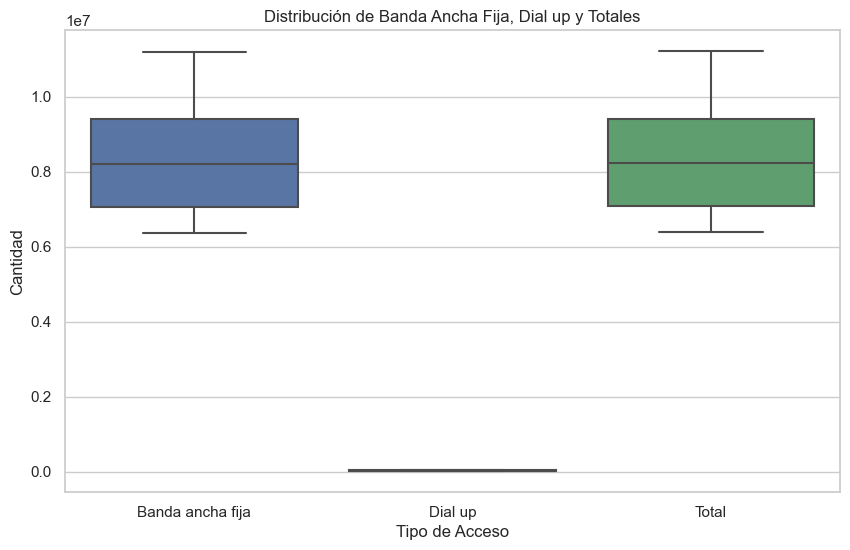

In [316]:
# Configurar el estilo de gráfico
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de cajas
sns.boxplot(data=nacional_por_banda_ancha_y_banda_angosta[['Banda ancha fija', 'Dial up', 'Total']])

# Personalizar el título y las etiquetas de los ejes
plt.title("Distribución de Banda Ancha Fija, Dial up y Totales")
plt.xlabel("Tipo de Acceso")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()


En la exploración de datos, se destaca la ausencia de datos atípicos (outliers), indicando que las cifras de accesos a banda ancha y dial-up son consistentes a lo largo del tiempo y no se observan valores extremos. Asimismo, al visualizar las gráficas de "Total" y "Banda ancha fija", se observa una notable similitud, sugiriendo que la banda ancha fija representa una proporción significativa del total de accesos.

Para profundizar en este análisis, se crea un DataFrame de porcentajes que refleja la influencia relativa de "Banda ancha fija" y "Dial Up" con respecto al total de accesos en cada provincia. Estos porcentajes nos permitirán entender mejor la distribución de tipos de acceso y su impacto en el panorama general de conectividad.

A continuación, se presenta el DataFrame de porcentajes numéricos para evaluar detalladamente cómo cada tipo de acceso contribuye al total en cada provincia, proporcionando una visión más precisa de la dinámica de conexiones a lo largo del tiempo.


In [318]:
# Calcular los porcentajes y agregar las columnas correspondientes
porcentajes_df['Porcentaje Banda Ancha'] = (porcentajes_df['Banda ancha fija'] / porcentajes_df['Total']) * 100
porcentajes_df['Porcentaje Dial Up'] = (porcentajes_df['Dial up'] / porcentajes_df['Total']) * 100

# Seleccionar las columnas relevantes
columnas_seleccionadas = ['Año', 'Trimestre', 'Porcentaje Banda Ancha', 'Porcentaje Dial Up']
porcentajes_numerico = porcentajes_df[columnas_seleccionadas]

# Mostrar el DataFrame de porcentajes numéricos
print(porcentajes_numerico)



     Año  Trimestre  Porcentaje Banda Ancha  Porcentaje Dial Up
0   2022          4                   99.89                0.11
1   2022          3                   99.89                0.11
2   2022          2                   99.89                0.11
3   2022          1                   99.88                0.12
4   2021          4                   99.88                0.12
5   2021          3                   99.90                0.10
6   2021          2                   99.89                0.11
7   2021          1                   99.90                0.10
8   2020          4                   99.90                0.10
9   2020          3                   99.89                0.11
10  2020          2                   99.89                0.11
11  2020          1                   99.89                0.11
12  2019          4                   99.88                0.12
13  2019          3                   99.76                0.24
14  2019          2                   99

Los porcentajes revelan una clara tendencia hacia el uso predominante de Banda Ancha en comparación con Dial Up a lo largo de los años. La participación de Banda Ancha se mantiene consistentemente alta, superando en ocasiones el 99.8%, mientras que Dial Up presenta una presencia mínima, generalmente por debajo del 0.2%. Esta marcada preferencia por Banda Ancha refleja la transición hacia tecnologías de conexión más avanzadas y eficientes, relegando gradualmente a Dial Up a un rol residual en el acceso a internet.

Observaremos el comportamiento de los accesos a internet desglosados por cada tipo: Dial Up y Banda Ancha. Dada la considerable disparidad entre estos dos tipos de acceso, optaremos por analizarlos por separado para poder captar de manera más detallada las tendencias y variaciones en cada categoría.

En consecuencia, construiremos dos gráficos independientes que nos permitirán visualizar de manera más precisa la evolución temporal de Dial Up y Banda Ancha respectivamente. Este enfoque nos facilitará la identificación de patrones específicos y cambios significativos en cada modalidad de acceso, brindándonos una visión más detallada de su comportamiento a lo largo del tiempo.

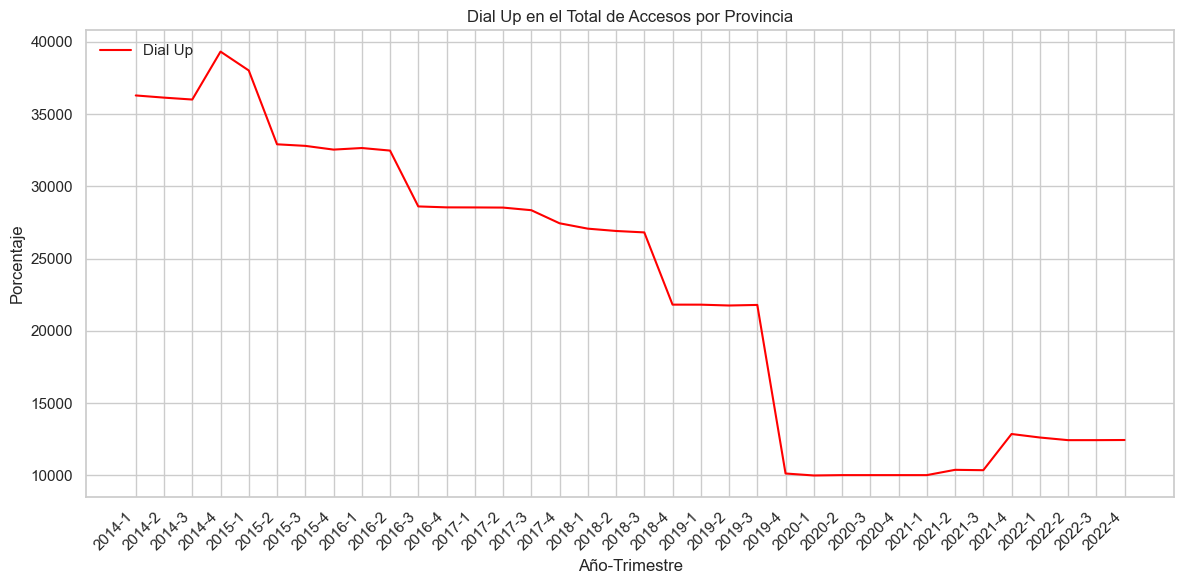

In [329]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Concatenar las columnas 'Año' y 'Trimestre'
nacional_por_banda_ancha_y_banda_angosta['Año-Trimestre'] = nacional_por_banda_ancha_y_banda_angosta['Año'].astype(str) + '-' + nacional_por_banda_ancha_y_banda_angosta['Trimestre'].astype(str)

# Ordenar el DataFrame por la columna 'Año-Trimestre'
nacional_por_banda_ancha_y_banda_angosta = nacional_por_banda_ancha_y_banda_angosta.sort_values(by='Año-Trimestre')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas para Dial Up
sns.lineplot(x="Año-Trimestre", y="Dial up", data=nacional_por_banda_ancha_y_banda_angosta, label="Dial Up", color="red")

# Personalizar el título y las etiquetas de los ejes
plt.title("Dial Up en el Total de Accesos por Provincia")
plt.xlabel("Año-Trimestre")
plt.ylabel("Porcentaje")

# Mostrar la leyenda
plt.legend(loc="upper left")

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()



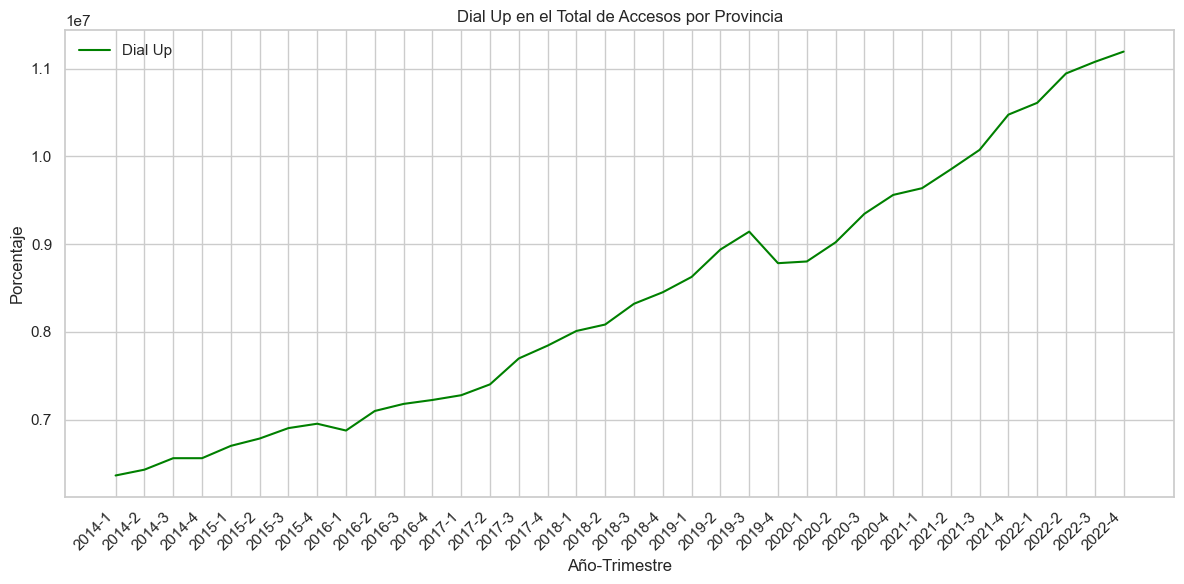

In [341]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Concatenar las columnas 'Año' y 'Trimestre'
nacional_por_banda_ancha_y_banda_angosta['Año-Trimestre'] = nacional_por_banda_ancha_y_banda_angosta['Año'].astype(str) + '-' + nacional_por_banda_ancha_y_banda_angosta['Trimestre'].astype(str)

# Ordenar el DataFrame por la columna 'Año-Trimestre'
nacional_por_banda_ancha_y_banda_angosta = nacional_por_banda_ancha_y_banda_angosta.sort_values(by='Año-Trimestre')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas para Dial Up
sns.lineplot(x="Año-Trimestre", y="Banda ancha fija", data=nacional_por_banda_ancha_y_banda_angosta, label="Dial Up", color="green")

# Personalizar el título y las etiquetas de los ejes
plt.title("Dial Up en el Total de Accesos por Provincia")
plt.xlabel("Año-Trimestre")
plt.ylabel("Porcentaje")

# Mostrar la leyenda
plt.legend(loc="upper left")

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# **Dataset 16:**  
# Conectividad al servicio de Internet  

In [330]:
conectividad_al_servicio_de_internet = pd.read_csv('datasets_cleaned/conectividad_al_servicio_de_internet.csv')

In [331]:
conectividad_al_servicio_de_internet.head(3)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.00,"-35,29298195","-61,40725421"
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.00,"-35,23949938","-60,82513588"
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.00,"-35,65119285","-60,70989628"


In [332]:
conectividad_al_servicio_de_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   object 
 15  Longitud        4311 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.0+ KB


In [333]:
columnas_interes = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital',
                   'Wireless', 'Telefonía Fija', '3G', '4G']

# Reemplazar "SI" por "1", "--" por "0" y convertir a entero.
for columna in columnas_interes:
    conectividad_al_servicio_de_internet[columna] = conectividad_al_servicio_de_internet[columna].str.replace("SI", "1")
    conectividad_al_servicio_de_internet[columna] = conectividad_al_servicio_de_internet[columna].str.replace("--", "0")
    conectividad_al_servicio_de_internet[columna] = conectividad_al_servicio_de_internet[columna].astype(int)

In [334]:
conectividad_al_servicio_de_internet.head(3)

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,1,0,0,0,0,0,1,1,1,6588010.00,"-35,29298195","-61,40725421"
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,0,0,0,0,0,0,1,1,1,6588020.00,"-35,23949938","-60,82513588"
2,BUENOS AIRES,9 de Julio,Dudignac,2670,0,0,1,0,0,1,1,1,1,6588040.00,"-35,65119285","-60,70989628"


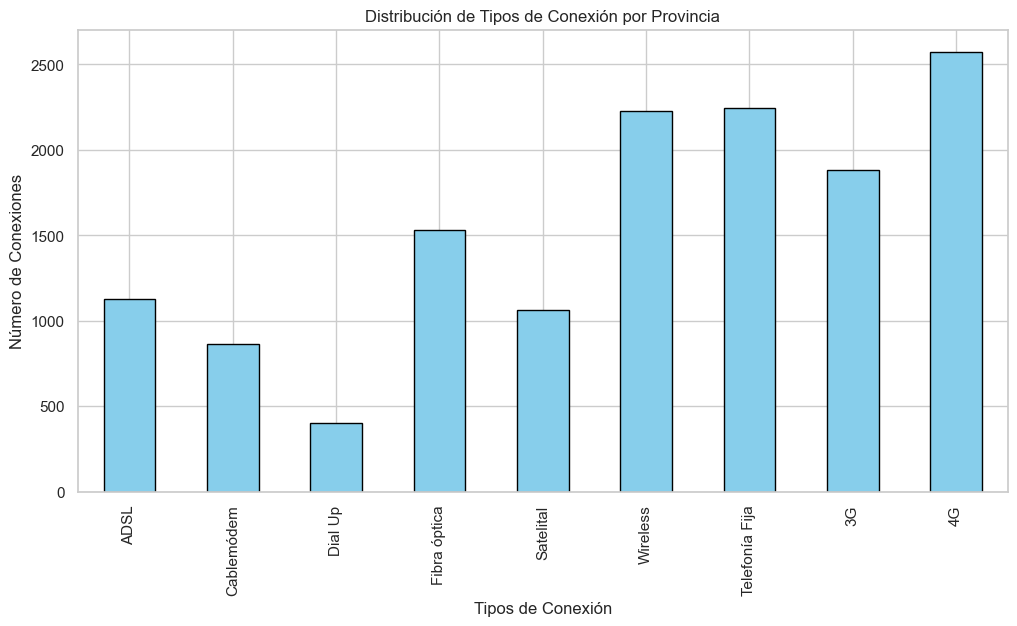

In [342]:
# Selecciona las columnas relevantes
df_seleccionado = conectividad_al_servicio_de_internet[columnas_interes]

# Suma el número de conexiones por cada tipo
total_por_tipo = df_seleccionado.sum()

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea el gráfico de barras
total_por_tipo.plot(kind='bar', color='skyblue',edgecolor='black')

# Personaliza el título y las etiquetas de los ejes
plt.title('Distribución de Tipos de Conexión por Provincia')
plt.xlabel('Tipos de Conexión')
plt.ylabel('Número de Conexiones')

# Muestra el gráfico
plt.show()


Se observa que las tecnologías de alta velocidad y capacidad, como 4G y Wireless, lideran el mercado, reflejando la preferencia por conexiones más rápidas y eficientes. La presencia mínima de Dial Up, una tecnología obsoleta y de baja velocidad, confirma su desuso y la transición hacia opciones más modernas.

La Telefonía Fija muestra una presencia significativa, indicando su relevancia continua en entornos fijos. Además, la predominancia de 4G destaca la importancia de las redes móviles de alta velocidad en diversas localidades. Sin embargo, es esencial considerar otros factores, como la población y la infraestructura existente, al interpretar estos datos. La presencia de tecnologías como 3G, fibra optica y Satelital sugiere una diversidad en la infraestructura de conexión, adaptándose a diferentes necesidades y ubicaciones.

Para una comprensión más profunda, es crucial explorar correlaciones entre las tecnologías. 

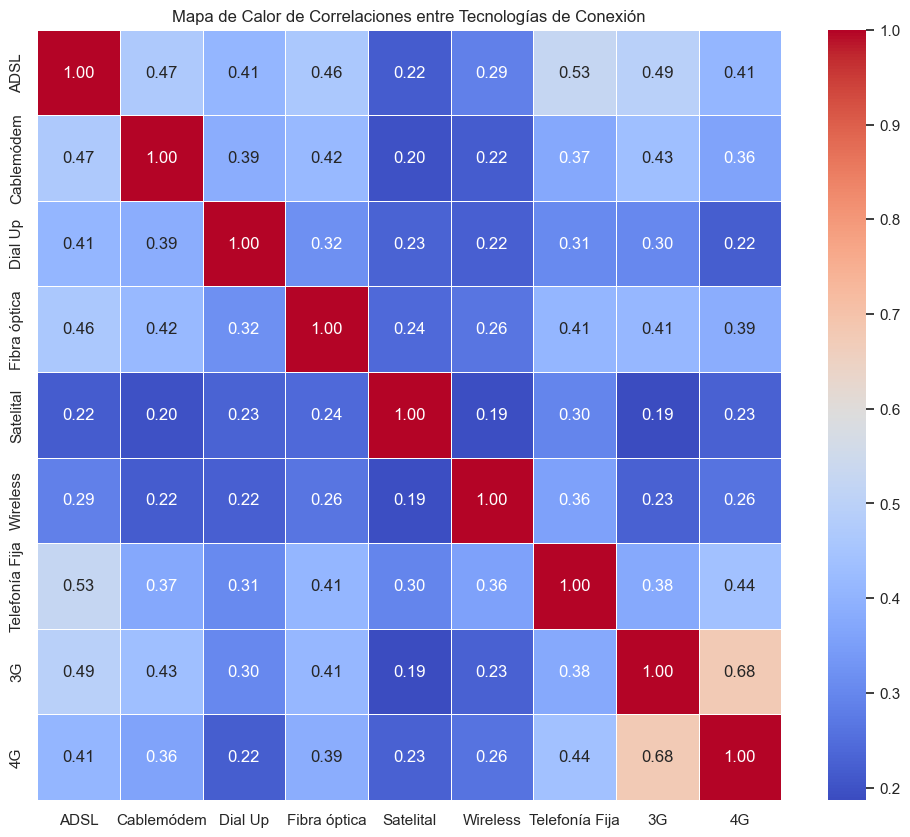

In [345]:
# Selecciona las columnas relevantes
df_seleccionado = conectividad_al_servicio_de_internet[columnas_interes]

# Calcula la matriz de correlación
correlacion = df_seleccionado.corr()

# Configura el estilo del gráfico
sns.set(style="white")

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea el mapa de calor
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Personaliza el título
plt.title('Mapa de Calor de Correlaciones entre Tecnologías de Conexión')

# Muestra el gráfico
plt.show()


En particular, la correlación de 0.53 entre ADSL y Telefonía Fija indica una relación moderada positiva. Esto sugiere que en algunas áreas donde hay presencia de ADSL, también es probable encontrar servicios de Telefonía Fija, y viceversa.

En contraste, la correlación más destacada se observa entre 3G y 4G, con un coeficiente de 0.68. Este valor indica una correlación positiva fuerte, sugiriendo que las localidades que tienen cobertura de 3G también tienden a tener cobertura de 4G y viceversa. Esto podría reflejar una estrategia de expansión y mejora de la infraestructura de red móvil en esas áreas.

Es importante señalar que la mayoría de las otras correlaciones son relativamente bajas, por debajo de 0.5. Esto indica una independencia o una relación débil entre esas tecnologías en las localidades analizadas. Estos hallazgos sugieren que la adopción de diferentes tecnologías de conexión en estas áreas puede estar influenciada por factores específicos del entorno local y las preferencias de los usuarios.